Desired grade: 265/300
Assembling the data: 60/60
Cleaning and organizing the dataset: 50/60
Exploratory Analysis of the dataset: 50/60
Visualizing the dataset: 45/60
Synthesis and Analysis of the dataset: 60/60

# Spotify Billboard Top 100 2011-2020 Analysis

## Overview

Using Spotipy, a Python package for pulling and analyzing data from Spotify, we will be analyzing various features of the Billboard top 100 songs through from 2011 to 2020.

## Goals

**1** Assemble a dataset from a playlist of all 1000 songs from the Billboard Top 100 rankings from 2011 - 2020/
**2** Clean/organize the data
**3** Analyze the data
**4** Create/evaluate a Machine Learning model
**5** Visualize key relationships/insights

From the Spotipy documentation site:

*Spotipy is a lightweight Python library for the Spotify Web API. With Spotipy you get full access to all of the music data provided by the Spotify platform.*
Source:https://spotipy.readthedocs.io/en/2.18.0/

In [2]:
#Package installation/upgrade
#pip install spotipy
#pip install spotipy --upgrade

In [3]:
#Importing packages
import os
import io
import pandas as pd
import matplotlib as plt
import numpy as np
#import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [4]:
#Import Spotipy packages
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth

In order to connect to a Spotify account and start pulling data, users must provide keys for Spotipy's authetication flows.

In [5]:
#Authorization factors to connect to my Spotify account
CLIENT_ID = "09e9b9faeae2475fbd26b3aa8bdeb0f3"
CLIENT_SECRET = "5bd2825167824ce2968c397abd41159c"
CLIENT_REDIRECT = "http://localhost/"
os.environ["SPOTIPY_CLIENT_ID"] = CLIENT_ID
os.environ["SPOTIPY_CLIENT_SECRET"] = CLIENT_SECRET
os.environ["SPOTIPY_REDIRECT_URI"] = CLIENT_REDIRECT

In [6]:
#More Authorization flow, using variables to get access tokens to allow data extraction from Spotify API
sp = spotipy.Spotify() 
from spotipy.oauth2 import SpotifyClientCredentials 
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
sp.trace=False

## Assembling the Data

In [7]:
#Creating a function that extracts track titles from a playlist. This is used multiple times later on through
#the data extraction.
track_list = []
def show_tracks(results):
    for i, item in enumerate(results['items']):
        track = item['track']
        track_list.append(track['name'])
    return track_list


#Creating a list of ranks from 1 to 100. This will be applied to each of the 100 songs from each year
rank_list = list(range(1,101))

In [7]:
#Create an empty master dataframe. This one will eventually contain 1000 songs, or the top 100 songs from the past
#10 years
billboard_2011_2020 = pd.DataFrame()

In [12]:
playlist['tracks']

{'href': 'https://api.spotify.com/v1/playlists/6qsTClrBMf59rUNnD3fzWc/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2012-07-27T15:11:30Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/125861772'},
    'href': 'https://api.spotify.com/v1/users/125861772',
    'id': '125861772',
    'type': 'user',
    'uri': 'spotify:user:125861772'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4dpARuHxo51G3z768sgnrY'},
       'href': 'https://api.spotify.com/v1/artists/4dpARuHxo51G3z768sgnrY',
       'id': '4dpARuHxo51G3z768sgnrY',
       'name': 'Adele',
       'type': 'artist',
       'uri': 'spotify:artist:4dpARuHxo51G3z768sgnrY'}],
     'available_markets': [],
     'external_urls': {'spotify': 'https://open.spotify.com/album/1azUkThwd2HfUDdeNeT147'},
     'href': 'https://api.spotify.com/v1/albums/1azUkThwd2Hf

Here is the first data pull. When provided a valid Spotify user ID and a playlsit's ID, Spotipy can access that playlist. The playlist variable holds a large amount of data for every song in a playlist. The playlist is sorted through to pull each song's id. That id is used in the audio_features command to pull various features from each song, which are stored as columns in a dataframe.

In this step, the audio features, year the songs made the top 100, and what ranking each song earned are the features of the dataframe.

In [8]:
#Using Spotipy to pull data from a playlist. the user_playlist command uses a user ID and the targeted playlist's ID
#as its parameters

playlist = sp.user_playlist("cloughjack.bchs", "6qsTClrBMf59rUNnD3fzWc?si=89f26a9b21de4ae5") 

#Create a list of song id's to be iterated through and analyzed for their audio features. Those features are put into a
#Dataframe
songs = playlist["tracks"]["items"] 
ids = []
for i in range(len(songs)): 
    ids.append(songs[i]["track"]["id"]) 
features = sp.audio_features(ids) 
billboard_2011 = pd.DataFrame(features)

#The audio_features command does not pull the song names, so this solves that issue
track_list = []
results = sp.playlist(playlist['id'], fields="tracks,next")
tracks = results['tracks']
#Function declared above that iterates through the list of song id's to pick out their titles.
show_tracks(tracks)

#This dataset is for songs that made the Billboard Top 100 in 2011, so this variable is 100 values of '2011'. Will
#come in handy when the full dataset is made. Essentially each record has '2011' in it to indicate it's 2011 rank.
year = ['2011' for i in range(100)]


#Create a dataframe for just billboard 2011 rankings, add the year and rankings to it.
billboard_2011['track_names'] = track_list
billboard_2011['year'] = year
billboard_2011['rank'] = rank_list

billboard_2011.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_names,year,rank
0,0.729,0.756,8,-5.119,1,0.0294,0.1310,0.0000,0.0527,0.522,...,audio_features,1CkvWZme3pRgbzaxZnTl5X,spotify:track:1CkvWZme3pRgbzaxZnTl5X,https://api.spotify.com/v1/tracks/1CkvWZme3pRg...,https://api.spotify.com/v1/audio-analysis/1Ckv...,228293,4,Rolling in the Deep,2011,1
1,0.750,0.727,5,-4.210,0,0.1420,0.0189,0.0000,0.2660,0.359,...,audio_features,0IkKz2J93C94Ei4BvDop7P,spotify:track:0IkKz2J93C94Ei4BvDop7P,https://api.spotify.com/v1/tracks/0IkKz2J93C94...,https://api.spotify.com/v1/audio-analysis/0IkK...,262173,4,Party Rock Anthem,2011,2
2,0.638,0.832,8,-5.039,1,0.0490,0.1410,0.0000,0.1130,0.648,...,audio_features,4wIjXMeLH3MrXEiaXNfYwC,spotify:track:4wIjXMeLH3MrXEiaXNfYwC,https://api.spotify.com/v1/tracks/4wIjXMeLH3Mr...,https://api.spotify.com/v1/audio-analysis/4wIj...,227893,4,Firework,2011,3
3,0.602,0.863,5,-5.423,0,0.0773,0.0178,0.0000,0.3890,0.732,...,audio_features,4S1qeuIO9X6oOW38r3O0R3,spotify:track:4S1qeuIO9X6oOW38r3O0R3,https://api.spotify.com/v1/tracks/4S1qeuIO9X6o...,https://api.spotify.com/v1/audio-analysis/4S1q...,206373,4,E.T.,2011,4
4,0.672,0.934,3,-3.206,1,0.1550,0.1610,0.0000,0.2780,0.487,...,audio_features,5oBPpIwObzAbBwdINug5I6,spotify:track:5oBPpIwObzAbBwdINug5I6,https://api.spotify.com/v1/tracks/5oBPpIwObzAb...,https://api.spotify.com/v1/audio-analysis/5oBP...,252307,4,"Give Me Everything (feat. Ne-Yo, Afrojack & Na...",2011,5
5,0.704,0.558,2,-7.273,0,0.0542,0.1480,0.0000,0.1070,0.245,...,audio_features,4lLtanYk6tkMvooU0tWzG8,spotify:track:4lLtanYk6tkMvooU0tWzG8,https://api.spotify.com/v1/tracks/4lLtanYk6tkM...,https://api.spotify.com/v1/audio-analysis/4lLt...,222091,4,Grenade,2011,6
6,0.696,0.875,0,-3.682,1,0.0649,0.1340,0.0000,0.1590,0.772,...,audio_features,7AqISujIaWcY3h5zrOqt5v,spotify:track:7AqISujIaWcY3h5zrOqt5v,https://api.spotify.com/v1/tracks/7AqISujIaWcY...,https://api.spotify.com/v1/audio-analysis/7AqI...,222733,4,Forget You,2011,7
7,0.767,0.738,11,-7.491,1,0.2310,0.0582,0.0109,0.4040,0.590,...,audio_features,2708Nq8H3EEBcahVCNsfTe,spotify:track:2708Nq8H3EEBcahVCNsfTe,https://api.spotify.com/v1/tracks/2708Nq8H3EEB...,https://api.spotify.com/v1/audio-analysis/2708...,201253,4,Super Bass,2011,8
8,0.720,0.770,9,-4.431,1,0.0498,0.0147,0.0000,0.3380,0.676,...,audio_features,50jy5FwPSIUp8olK1KuaVS,spotify:track:50jy5FwPSIUp8olK1KuaVS,https://api.spotify.com/v1/tracks/50jy5FwPSIUp...,https://api.spotify.com/v1/audio-analysis/50jy...,201600,4,Moves Like Jagger - Studio Recording From The ...,2011,9
9,0.483,0.628,0,-8.642,0,0.2560,0.1650,0.0000,0.0903,0.218,...,audio_features,1nPPh0CiKqVvYl4Mx1aZ21,spotify:track:1nPPh0CiKqVvYl4Mx1aZ21,https://api.spotify.com/v1/tracks/1nPPh0CiKqVv...,https://api.spotify.com/v1/audio-analysis/1nPP...,219440,4,Just Can’t Get Enough,2011,10


Next, the 100 songs pulled are added to the dataframe that will eventually hold all 1000 songs.

In [200]:
billboard_1 = billboard_2011_2020.append(billboard_2011, ignore_index = True)
billboard_1.tail(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_names,year,rank
90,0.698,0.879,4,-3.928,0,0.0306,0.002360,0.119000,0.1290,0.645,120.018,audio_features,3wkKkFAtYSTRwqOydW6T0I,spotify:track:3wkKkFAtYSTRwqOydW6T0I,https://api.spotify.com/v1/tracks/3wkKkFAtYSTR...,https://api.spotify.com/v1/audio-analysis/3wkK...,196813,4,Please Don't Go,2011,91
91,0.684,0.607,11,-8.127,0,0.1000,0.026700,0.000307,0.1910,0.498,81.001,audio_features,0JXXNGljqupsJaZsgSbMZV,spotify:track:0JXXNGljqupsJaZsgSbMZV,https://api.spotify.com/v1/tracks/0JXXNGljqups...,https://api.spotify.com/v1/audio-analysis/0JXX...,195373,4,Sure Thing,2011,92
92,0.641,0.836,5,-3.952,1,0.1960,0.028700,0.000004,0.1520,0.694,174.968,audio_features,6ezyEFqZDgQUvxpaDv4jKO,spotify:track:6ezyEFqZDgQUvxpaDv4jKO,https://api.spotify.com/v1/tracks/6ezyEFqZDgQU...,https://api.spotify.com/v1/audio-analysis/6ezy...,222533,4,Price Tag,2011,93
93,0.483,0.844,2,-5.043,1,0.0314,0.004810,0.000073,0.4050,0.543,151.977,audio_features,0w9LJae3sVlZlH2CnxTInF,spotify:track:0w9LJae3sVlZlH2CnxTInF,https://api.spotify.com/v1/tracks/0w9LJae3sVlZ...,https://api.spotify.com/v1/audio-analysis/0w9L...,229533,4,God Gave Me You,2011,94
94,0.418,0.822,8,-5.060,1,0.0545,0.000123,0.000000,0.2660,0.108,98.936,audio_features,1WH1mGKDXbvV3EApLMOaXn,spotify:track:1WH1mGKDXbvV3EApLMOaXn,https://api.spotify.com/v1/tracks/1WH1mGKDXbvV...,https://api.spotify.com/v1/audio-analysis/1WH1...,305840,5,She Will,2011,95
95,0.485,0.701,8,-3.807,1,0.0288,0.039000,0.000000,0.0977,0.613,151.948,audio_features,6xtXdS8ALTfK0g9hOG1PSX,spotify:track:6xtXdS8ALTfK0g9hOG1PSX,https://api.spotify.com/v1/tracks/6xtXdS8ALTfK...,https://api.spotify.com/v1/audio-analysis/6xtX...,184920,4,Are You Gonna Kiss Me Or Not,2011,96
96,0.482,0.833,5,-5.611,1,0.0449,0.000346,0.000000,0.3650,0.740,148.039,audio_features,1fBl642IhJOE5U319Gy2Go,spotify:track:1fBl642IhJOE5U319Gy2Go,https://api.spotify.com/v1/tracks/1fBl642IhJOE...,https://api.spotify.com/v1/audio-analysis/1fBl...,212293,4,Animal,2011,97
97,0.691,0.454,6,-9.130,1,0.0256,0.437000,0.002270,0.0783,0.350,135.839,audio_features,1t2hJFgJyUPD2crOafMUEk,spotify:track:1t2hJFgJyUPD2crOafMUEk,https://api.spotify.com/v1/tracks/1t2hJFgJyUPD...,https://api.spotify.com/v1/audio-analysis/1t2h...,242840,4,You and Tequila (feat. Grace Potter),2011,98
98,0.667,0.381,3,-7.494,1,0.0294,0.458000,0.000000,0.1160,0.199,135.979,audio_features,0tDElYeVQUlbGdTHf7S0bK,spotify:track:0tDElYeVQUlbGdTHf7S0bK,https://api.spotify.com/v1/tracks/0tDElYeVQUlb...,https://api.spotify.com/v1/audio-analysis/0tDE...,273893,4,Colder Weather,2011,99
99,0.365,0.792,8,-5.479,1,0.2170,0.106000,0.000000,0.1910,0.361,80.090,audio_features,6Uj0DygqlzJqduyny4lMA6,spotify:track:6Uj0DygqlzJqduyny4lMA6,https://api.spotify.com/v1/tracks/6Uj0DygqlzJq...,https://api.spotify.com/v1/audio-analysis/6Uj0...,255160,4,My Last - Album Version (Edited),2011,100


In [127]:
#Repeating the same steps as above, just changing the playlist ID to target a paylist of the top 100 songs from 2012
playlist = sp.user_playlist("cloughjack.bchs", "2ceLNBhdveGf4Nfcq8BECJ") 

songs = playlist["tracks"]["items"] 
ids = []
for i in range(len(songs)): 
    ids.append(songs[i]["track"]["id"]) 
features = sp.audio_features(ids) 
billboard_2012 = pd.DataFrame(features)

track_list = []
results = sp.playlist(playlist['id'], fields="tracks,next")
tracks = results['tracks']
show_tracks(tracks)
len(track_list)

year = ['2012' for i in range(100)]

billboard_2012['track_names'] = track_list
billboard_2012['year'] = year
billboard_2012['rank'] = rank_list

billboard_2012.tail(10)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_names,year,rank
90,0.656,0.884,2,-4.748,1,0.0372,0.016200,0.000000,0.1450,0.860,105.009,audio_features,7pUYFGnZwLa7I3UmDypJGy,spotify:track:7pUYFGnZwLa7I3UmDypJGy,https://api.spotify.com/v1/tracks/7pUYFGnZwLa7...,https://api.spotify.com/v1/audio-analysis/7pUY...,237987,4,It's Time,2012,91
91,0.831,0.665,1,-3.627,0,0.0711,0.149000,0.000000,0.0636,0.663,129.989,audio_features,1POAx4NMLOBPVKZUSsBh92,spotify:track:1POAx4NMLOBPVKZUSsBh92,https://api.spotify.com/v1/tracks/1POAx4NMLOBP...,https://api.spotify.com/v1/audio-analysis/1POA...,238760,4,Cashin' Out,2012,92
92,0.616,0.728,9,-4.020,0,0.0278,0.027500,0.000000,0.2280,0.375,111.934,audio_features,0cV4xwUA4ue2deqq4CZFko,spotify:track:0cV4xwUA4ue2deqq4CZFko,https://api.spotify.com/v1/tracks/0cV4xwUA4ue2...,https://api.spotify.com/v1/audio-analysis/0cV4...,219973,4,I Don't Want This Night To End,2012,93
93,0.564,0.710,11,-4.920,0,0.0461,0.001250,0.000000,0.1090,0.393,91.972,audio_features,7Kt59L2ZZGtOnIhvMwzG6f,spotify:track:7Kt59L2ZZGtOnIhvMwzG6f,https://api.spotify.com/v1/tracks/7Kt59L2ZZGtO...,https://api.spotify.com/v1/audio-analysis/7Kt5...,225147,4,Diamonds,2012,94
94,0.638,0.722,9,-6.177,1,0.0332,0.011900,0.008080,0.1890,0.469,103.017,audio_features,6E9V9TRlVOLjenGjHemzEH,spotify:track:6E9V9TRlVOLjenGjHemzEH,https://api.spotify.com/v1/tracks/6E9V9TRlVOLj...,https://api.spotify.com/v1/audio-analysis/6E9V...,224293,4,Hard To Love,2012,95
95,0.554,0.794,11,-5.417,1,0.0350,0.069700,0.000000,0.6300,0.790,176.010,audio_features,6Ymvlzom4TQeoKqAWsZRD8,spotify:track:6Ymvlzom4TQeoKqAWsZRD8,https://api.spotify.com/v1/tracks/6Ymvlzom4TQe...,https://api.spotify.com/v1/audio-analysis/6Ymv...,213827,4,Somethin' 'Bout A Truck,2012,96
96,0.625,0.576,11,-5.693,0,0.1750,0.054300,0.000041,0.1870,0.235,179.063,audio_features,3trS6e40JCVUOpPVt5OdHj,spotify:track:3trS6e40JCVUOpPVt5OdHj,https://api.spotify.com/v1/tracks/3trS6e40JCVU...,https://api.spotify.com/v1/audio-analysis/3trS...,193147,4,Adorn,2012,97
97,0.480,0.739,7,-3.260,1,0.0323,0.064400,0.000000,0.1020,0.194,81.519,audio_features,5r6hrzcBhlnV9eDSKD2WQ9,spotify:track:5r6hrzcBhlnV9eDSKD2WQ9,https://api.spotify.com/v1/tracks/5r6hrzcBhlnV...,https://api.spotify.com/v1/audio-analysis/5r6h...,218267,4,Fly over States,2012,98
98,0.495,0.527,0,-4.742,1,0.0351,0.000159,0.016300,0.1000,0.574,208.067,audio_features,0Nu9WA8kEbBWEsay2s8Q0U,spotify:track:0Nu9WA8kEbBWEsay2s8Q0U,https://api.spotify.com/v1/tracks/0Nu9WA8kEbBW...,https://api.spotify.com/v1/audio-analysis/0Nu9...,220520,4,Even If It Breaks Your Heart,2012,99
99,0.585,0.972,9,-4.450,0,0.0534,0.014300,0.000000,0.0707,0.585,110.006,audio_features,7oVEtyuv9NBmnytsCIsY5I,spotify:track:7oVEtyuv9NBmnytsCIsY5I,https://api.spotify.com/v1/tracks/7oVEtyuv9NBm...,https://api.spotify.com/v1/audio-analysis/7oVE...,230253,4,BURN IT DOWN,2012,100


In [201]:
#Creating another dataset that joins this one with the first one. Lengthy process but it gets the job done
billboard_2 = billboard_1.append(billboard_2012, ignore_index = True)
billboard_2.tail(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_names,year,rank
190,0.656,0.884,2,-4.748,1,0.0372,0.016200,0.000000,0.1450,0.860,105.009,audio_features,7pUYFGnZwLa7I3UmDypJGy,spotify:track:7pUYFGnZwLa7I3UmDypJGy,https://api.spotify.com/v1/tracks/7pUYFGnZwLa7...,https://api.spotify.com/v1/audio-analysis/7pUY...,237987,4,It's Time,2012,91
191,0.831,0.665,1,-3.627,0,0.0711,0.149000,0.000000,0.0636,0.663,129.989,audio_features,1POAx4NMLOBPVKZUSsBh92,spotify:track:1POAx4NMLOBPVKZUSsBh92,https://api.spotify.com/v1/tracks/1POAx4NMLOBP...,https://api.spotify.com/v1/audio-analysis/1POA...,238760,4,Cashin' Out,2012,92
192,0.616,0.728,9,-4.020,0,0.0278,0.027500,0.000000,0.2280,0.375,111.934,audio_features,0cV4xwUA4ue2deqq4CZFko,spotify:track:0cV4xwUA4ue2deqq4CZFko,https://api.spotify.com/v1/tracks/0cV4xwUA4ue2...,https://api.spotify.com/v1/audio-analysis/0cV4...,219973,4,I Don't Want This Night To End,2012,93
193,0.564,0.710,11,-4.920,0,0.0461,0.001250,0.000000,0.1090,0.393,91.972,audio_features,7Kt59L2ZZGtOnIhvMwzG6f,spotify:track:7Kt59L2ZZGtOnIhvMwzG6f,https://api.spotify.com/v1/tracks/7Kt59L2ZZGtO...,https://api.spotify.com/v1/audio-analysis/7Kt5...,225147,4,Diamonds,2012,94
194,0.638,0.722,9,-6.177,1,0.0332,0.011900,0.008080,0.1890,0.469,103.017,audio_features,6E9V9TRlVOLjenGjHemzEH,spotify:track:6E9V9TRlVOLjenGjHemzEH,https://api.spotify.com/v1/tracks/6E9V9TRlVOLj...,https://api.spotify.com/v1/audio-analysis/6E9V...,224293,4,Hard To Love,2012,95
195,0.554,0.794,11,-5.417,1,0.0350,0.069700,0.000000,0.6300,0.790,176.010,audio_features,6Ymvlzom4TQeoKqAWsZRD8,spotify:track:6Ymvlzom4TQeoKqAWsZRD8,https://api.spotify.com/v1/tracks/6Ymvlzom4TQe...,https://api.spotify.com/v1/audio-analysis/6Ymv...,213827,4,Somethin' 'Bout A Truck,2012,96
196,0.625,0.576,11,-5.693,0,0.1750,0.054300,0.000041,0.1870,0.235,179.063,audio_features,3trS6e40JCVUOpPVt5OdHj,spotify:track:3trS6e40JCVUOpPVt5OdHj,https://api.spotify.com/v1/tracks/3trS6e40JCVU...,https://api.spotify.com/v1/audio-analysis/3trS...,193147,4,Adorn,2012,97
197,0.480,0.739,7,-3.260,1,0.0323,0.064400,0.000000,0.1020,0.194,81.519,audio_features,5r6hrzcBhlnV9eDSKD2WQ9,spotify:track:5r6hrzcBhlnV9eDSKD2WQ9,https://api.spotify.com/v1/tracks/5r6hrzcBhlnV...,https://api.spotify.com/v1/audio-analysis/5r6h...,218267,4,Fly over States,2012,98
198,0.495,0.527,0,-4.742,1,0.0351,0.000159,0.016300,0.1000,0.574,208.067,audio_features,0Nu9WA8kEbBWEsay2s8Q0U,spotify:track:0Nu9WA8kEbBWEsay2s8Q0U,https://api.spotify.com/v1/tracks/0Nu9WA8kEbBW...,https://api.spotify.com/v1/audio-analysis/0Nu9...,220520,4,Even If It Breaks Your Heart,2012,99
199,0.585,0.972,9,-4.450,0,0.0534,0.014300,0.000000,0.0707,0.585,110.006,audio_features,7oVEtyuv9NBmnytsCIsY5I,spotify:track:7oVEtyuv9NBmnytsCIsY5I,https://api.spotify.com/v1/tracks/7oVEtyuv9NBm...,https://api.spotify.com/v1/audio-analysis/7oVE...,230253,4,BURN IT DOWN,2012,100


In [202]:
#Top 100 songs from 2013
playlist = sp.user_playlist("cloughjack.bchs", "4dDcFIQX8SU4Hi0BDyB4hy") 

songs = playlist["tracks"]["items"] 
ids = []
for i in range(len(songs)): 
    ids.append(songs[i]["track"]["id"]) 
features = sp.audio_features(ids) 
billboard_2013 = pd.DataFrame(features)

track_list = []
results = sp.playlist(playlist['id'], fields="tracks,next")
tracks = results['tracks']
show_tracks(tracks)
len(track_list)

year = ['2013' for i in range(100)]

billboard_2013['track_names'] = track_list
billboard_2013['year'] = year
billboard_2013['rank'] = rank_list

billboard_2013.tail(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_names,year,rank
90,0.535,0.829,9,-4.987,1,0.0432,0.16900,0.000000,0.4060,0.957,169.745,audio_features,66u9s8Si6NPNdC3amR44RC,spotify:track:66u9s8Si6NPNdC3amR44RC,https://api.spotify.com/v1/tracks/66u9s8Si6NPN...,https://api.spotify.com/v1/audio-analysis/66u9...,196449,4,Downtown,2013,91
91,0.497,0.927,0,-4.520,1,0.0371,0.00286,0.000001,0.4130,0.607,96.991,audio_features,6s9ICeczYOfbHHIaSMq9jd,spotify:track:6s9ICeczYOfbHHIaSMq9jd,https://api.spotify.com/v1/tracks/6s9ICeczYOfb...,https://api.spotify.com/v1/audio-analysis/6s9I...,222013,4,Get Your Shine On,2013,92
92,0.797,0.608,6,-6.096,0,0.0584,0.00112,0.000077,0.0748,0.402,127.999,audio_features,01TuObJVd7owWchVRuQbQw,spotify:track:01TuObJVd7owWchVRuQbQw,https://api.spotify.com/v1/tracks/01TuObJVd7ow...,https://api.spotify.com/v1/audio-analysis/01Tu...,279507,4,#thatPOWER,2013,93
93,0.562,0.829,10,-3.386,0,0.0516,0.00568,0.000007,0.0401,0.744,185.055,audio_features,4uernaqrGGvb2ncMd4wibP,spotify:track:4uernaqrGGvb2ncMd4wibP,https://api.spotify.com/v1/tracks/4uernaqrGGvb...,https://api.spotify.com/v1/audio-analysis/4uer...,218960,4,Brave,2013,94
94,0.479,0.545,7,-7.346,1,0.0688,0.36500,0.000000,0.0963,0.244,74.897,audio_features,6GmUVqe73u5YRfUUynZK6I,spotify:track:6GmUVqe73u5YRfUUynZK6I,https://api.spotify.com/v1/tracks/6GmUVqe73u5Y...,https://api.spotify.com/v1/audio-analysis/6GmU...,252733,4,Let Her Go,2013,95
95,0.532,0.801,2,-3.759,1,0.0393,0.03710,0.000007,0.0633,0.799,172.050,audio_features,7CL6oaDC9d0QXFMQRkNBmy,spotify:track:7CL6oaDC9d0QXFMQRkNBmy,https://api.spotify.com/v1/tracks/7CL6oaDC9d0Q...,https://api.spotify.com/v1/audio-analysis/7CL6...,193573,4,Runnin' Outta Moonlight,2013,96
96,0.936,0.702,10,-5.305,1,0.0615,0.04730,0.000000,0.0838,0.704,97.524,audio_features,6J5sxraPPZ4b0CVOGAgpXj,spotify:track:6J5sxraPPZ4b0CVOGAgpXj,https://api.spotify.com/v1/tracks/6J5sxraPPZ4b...,https://api.spotify.com/v1/audio-analysis/6J5s...,207040,4,I'm Different,2013,97
97,0.602,0.923,5,-3.763,1,0.0440,0.00980,0.000000,0.0561,0.765,136.010,audio_features,1yjY7rpaAQvKwpdUliHx0d,spotify:track:1yjY7rpaAQvKwpdUliHx0d,https://api.spotify.com/v1/tracks/1yjY7rpaAQvK...,https://api.spotify.com/v1/audio-analysis/1yjY...,216013,4,Still into You,2013,98
98,0.607,0.784,7,-6.293,1,0.2680,0.43300,0.000000,0.6890,0.482,81.004,audio_features,6JG0qhINKVwiHxqN85j7RG,spotify:track:6JG0qhINKVwiHxqN85j7RG,https://api.spotify.com/v1/tracks/6JG0qhINKVwi...,https://api.spotify.com/v1/audio-analysis/6JG0...,278573,4,Crooked Smile (feat. TLC),2013,99
99,0.845,0.540,10,-7.864,0,0.1270,0.02990,0.000000,0.1200,0.443,97.516,audio_features,0Nf3vtVBfiayZL7c8r4KBO,spotify:track:0Nf3vtVBfiayZL7c8r4KBO,https://api.spotify.com/v1/tracks/0Nf3vtVBfiay...,https://api.spotify.com/v1/audio-analysis/0Nf3...,207267,4,Gas Pedal,2013,100


In [130]:
#Creating a dataset appending this one to the combo of 2012 and 2011 songs
billboard_3 = billboard_2.append(billboard_2013, ignore_index = True)
billboard_3.tail(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_names,year,rank
290,0.535,0.829,9,-4.987,1,0.0432,0.16900,0.000000,0.4060,0.957,169.745,audio_features,66u9s8Si6NPNdC3amR44RC,spotify:track:66u9s8Si6NPNdC3amR44RC,https://api.spotify.com/v1/tracks/66u9s8Si6NPN...,https://api.spotify.com/v1/audio-analysis/66u9...,196449,4,Downtown,2013,91
291,0.497,0.927,0,-4.520,1,0.0371,0.00286,0.000001,0.4130,0.607,96.991,audio_features,6s9ICeczYOfbHHIaSMq9jd,spotify:track:6s9ICeczYOfbHHIaSMq9jd,https://api.spotify.com/v1/tracks/6s9ICeczYOfb...,https://api.spotify.com/v1/audio-analysis/6s9I...,222013,4,Get Your Shine On,2013,92
292,0.797,0.608,6,-6.096,0,0.0584,0.00112,0.000077,0.0748,0.402,127.999,audio_features,01TuObJVd7owWchVRuQbQw,spotify:track:01TuObJVd7owWchVRuQbQw,https://api.spotify.com/v1/tracks/01TuObJVd7ow...,https://api.spotify.com/v1/audio-analysis/01Tu...,279507,4,#thatPOWER,2013,93
293,0.562,0.829,10,-3.386,0,0.0516,0.00568,0.000007,0.0401,0.744,185.055,audio_features,4uernaqrGGvb2ncMd4wibP,spotify:track:4uernaqrGGvb2ncMd4wibP,https://api.spotify.com/v1/tracks/4uernaqrGGvb...,https://api.spotify.com/v1/audio-analysis/4uer...,218960,4,Brave,2013,94
294,0.479,0.545,7,-7.346,1,0.0688,0.36500,0.000000,0.0963,0.244,74.897,audio_features,6GmUVqe73u5YRfUUynZK6I,spotify:track:6GmUVqe73u5YRfUUynZK6I,https://api.spotify.com/v1/tracks/6GmUVqe73u5Y...,https://api.spotify.com/v1/audio-analysis/6GmU...,252733,4,Let Her Go,2013,95
295,0.532,0.801,2,-3.759,1,0.0393,0.03710,0.000007,0.0633,0.799,172.050,audio_features,7CL6oaDC9d0QXFMQRkNBmy,spotify:track:7CL6oaDC9d0QXFMQRkNBmy,https://api.spotify.com/v1/tracks/7CL6oaDC9d0Q...,https://api.spotify.com/v1/audio-analysis/7CL6...,193573,4,Runnin' Outta Moonlight,2013,96
296,0.936,0.702,10,-5.305,1,0.0615,0.04730,0.000000,0.0838,0.704,97.524,audio_features,6J5sxraPPZ4b0CVOGAgpXj,spotify:track:6J5sxraPPZ4b0CVOGAgpXj,https://api.spotify.com/v1/tracks/6J5sxraPPZ4b...,https://api.spotify.com/v1/audio-analysis/6J5s...,207040,4,I'm Different,2013,97
297,0.602,0.923,5,-3.763,1,0.0440,0.00980,0.000000,0.0561,0.765,136.010,audio_features,1yjY7rpaAQvKwpdUliHx0d,spotify:track:1yjY7rpaAQvKwpdUliHx0d,https://api.spotify.com/v1/tracks/1yjY7rpaAQvK...,https://api.spotify.com/v1/audio-analysis/1yjY...,216013,4,Still into You,2013,98
298,0.607,0.784,7,-6.293,1,0.2680,0.43300,0.000000,0.6890,0.482,81.004,audio_features,6JG0qhINKVwiHxqN85j7RG,spotify:track:6JG0qhINKVwiHxqN85j7RG,https://api.spotify.com/v1/tracks/6JG0qhINKVwi...,https://api.spotify.com/v1/audio-analysis/6JG0...,278573,4,Crooked Smile (feat. TLC),2013,99
299,0.845,0.540,10,-7.864,0,0.1270,0.02990,0.000000,0.1200,0.443,97.516,audio_features,0Nf3vtVBfiayZL7c8r4KBO,spotify:track:0Nf3vtVBfiayZL7c8r4KBO,https://api.spotify.com/v1/tracks/0Nf3vtVBfiay...,https://api.spotify.com/v1/audio-analysis/0Nf3...,207267,4,Gas Pedal,2013,100


In [131]:
#Top 100 songs from 2014
playlist = sp.user_playlist("cloughjack.bchs", "36QMGKn8SlbkIOa9ni9pMd") 

songs = playlist["tracks"]["items"] 
ids = []
for i in range(len(songs)): 
    ids.append(songs[i]["track"]["id"]) 
features = sp.audio_features(ids) 
billboard_2014 = pd.DataFrame(features)

track_list = []
results = sp.playlist(playlist['id'], fields="tracks,next")
tracks = results['tracks']
show_tracks(tracks)
len(track_list)

year = ['2014' for i in range(100)]

billboard_2014['track_names'] = track_list
billboard_2014['year'] = year
billboard_2014['rank'] = rank_list

billboard_2014.tail(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_names,year,rank
90,0.527,0.902,6,-5.352,1,0.0601,0.344000,0.000046,0.0669,0.709,181.964,audio_features,5dNGORzxFb5z3v7vSAFkTU,spotify:track:5dNGORzxFb5z3v7vSAFkTU,https://api.spotify.com/v1/tracks/5dNGORzxFb5z...,https://api.spotify.com/v1/audio-analysis/5dNG...,191040,4,Beachin',2014,91
91,0.767,0.782,7,-5.545,1,0.1400,0.054100,0.000000,0.3380,0.827,116.491,audio_features,6I3KeXBT0E9MoMqYz8srVq,spotify:track:6I3KeXBT0E9MoMqYz8srVq,https://api.spotify.com/v1/tracks/6I3KeXBT0E9M...,https://api.spotify.com/v1/audio-analysis/6I3K...,220319,4,White Walls (feat. ScHoolboy Q & Hollis),2014,92
92,0.494,0.951,9,-4.237,1,0.1320,0.000569,0.000000,0.3270,0.441,160.025,audio_features,1gugDOSMREb34Xo0c1PlxM,spotify:track:1gugDOSMREb34Xo0c1PlxM,https://api.spotify.com/v1/tracks/1gugDOSMREb3...,https://api.spotify.com/v1/audio-analysis/1gug...,202496,4,She Looks So Perfect,2014,93
93,0.657,0.769,7,-5.364,1,0.0697,0.032500,0.000000,0.3450,0.497,89.247,audio_features,1bPDYmkG189hkqf3iosrSI,spotify:track:1bPDYmkG189hkqf3iosrSI,https://api.spotify.com/v1/tracks/1bPDYmkG189h...,https://api.spotify.com/v1/audio-analysis/1bPD...,237267,4,Stay The Night,2014,94
94,0.412,0.441,11,-11.523,0,0.2910,0.029600,0.072600,0.3060,0.174,185.571,audio_features,5hgnY0mVcVetszbb85qeDg,spotify:track:5hgnY0mVcVetszbb85qeDg,https://api.spotify.com/v1/tracks/5hgnY0mVcVet...,https://api.spotify.com/v1/audio-analysis/5hgn...,319467,4,Partition,2014,95
95,0.709,0.589,8,-7.776,0,0.0433,0.050700,0.000000,0.0585,0.580,133.922,audio_features,29gsi1zZrZxdStACmTQB0Z,spotify:track:29gsi1zZrZxdStACmTQB0Z,https://api.spotify.com/v1/tracks/29gsi1zZrZxd...,https://api.spotify.com/v1/audio-analysis/29gs...,278067,3,Studio,2014,96
96,0.559,0.716,11,-3.964,0,0.3900,0.737000,0.000000,0.2520,0.504,176.618,audio_features,4jtyUzZm9WLc2AdaJ1dso7,spotify:track:4jtyUzZm9WLc2AdaJ1dso7,https://api.spotify.com/v1/tracks/4jtyUzZm9WLc...,https://api.spotify.com/v1/audio-analysis/4jty...,275227,4,0 To 100 / The Catch Up,2014,97
97,0.587,0.559,1,-7.742,1,0.0321,0.399000,0.000007,0.0992,0.190,92.036,audio_features,5aj0xPGiEUN3aI2oOYu14S,spotify:track:5aj0xPGiEUN3aI2oOYu14S,https://api.spotify.com/v1/tracks/5aj0xPGiEUN3...,https://api.spotify.com/v1/audio-analysis/5aj0...,221173,4,I Don't Dance,2014,98
98,0.680,0.888,9,-5.308,1,0.0550,0.052700,0.000003,0.0575,0.484,90.076,audio_features,6s9m5J92By7jii22Q2XtY2,spotify:track:6s9m5J92By7jii22Q2XtY2,https://api.spotify.com/v1/tracks/6s9m5J92By7j...,https://api.spotify.com/v1/audio-analysis/6s9m...,169587,4,Somethin' Bad (with Carrie Underwood) - (Duet ...,2014,99
99,0.583,0.655,0,-5.407,1,0.0315,0.111000,0.000004,0.1130,0.201,119.759,audio_features,5AnCLGg35ziFOloEnXK4uu,spotify:track:5AnCLGg35ziFOloEnXK4uu,https://api.spotify.com/v1/tracks/5AnCLGg35ziF...,https://api.spotify.com/v1/audio-analysis/5AnC...,278747,4,Adore You,2014,100


In [132]:
billboard_4 = billboard_3.append(billboard_2014, ignore_index = True)
billboard_4.tail(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_names,year,rank
390,0.527,0.902,6,-5.352,1,0.0601,0.344000,0.000046,0.0669,0.709,181.964,audio_features,5dNGORzxFb5z3v7vSAFkTU,spotify:track:5dNGORzxFb5z3v7vSAFkTU,https://api.spotify.com/v1/tracks/5dNGORzxFb5z...,https://api.spotify.com/v1/audio-analysis/5dNG...,191040,4,Beachin',2014,91
391,0.767,0.782,7,-5.545,1,0.1400,0.054100,0.000000,0.3380,0.827,116.491,audio_features,6I3KeXBT0E9MoMqYz8srVq,spotify:track:6I3KeXBT0E9MoMqYz8srVq,https://api.spotify.com/v1/tracks/6I3KeXBT0E9M...,https://api.spotify.com/v1/audio-analysis/6I3K...,220319,4,White Walls (feat. ScHoolboy Q & Hollis),2014,92
392,0.494,0.951,9,-4.237,1,0.1320,0.000569,0.000000,0.3270,0.441,160.025,audio_features,1gugDOSMREb34Xo0c1PlxM,spotify:track:1gugDOSMREb34Xo0c1PlxM,https://api.spotify.com/v1/tracks/1gugDOSMREb3...,https://api.spotify.com/v1/audio-analysis/1gug...,202496,4,She Looks So Perfect,2014,93
393,0.657,0.769,7,-5.364,1,0.0697,0.032500,0.000000,0.3450,0.497,89.247,audio_features,1bPDYmkG189hkqf3iosrSI,spotify:track:1bPDYmkG189hkqf3iosrSI,https://api.spotify.com/v1/tracks/1bPDYmkG189h...,https://api.spotify.com/v1/audio-analysis/1bPD...,237267,4,Stay The Night,2014,94
394,0.412,0.441,11,-11.523,0,0.2910,0.029600,0.072600,0.3060,0.174,185.571,audio_features,5hgnY0mVcVetszbb85qeDg,spotify:track:5hgnY0mVcVetszbb85qeDg,https://api.spotify.com/v1/tracks/5hgnY0mVcVet...,https://api.spotify.com/v1/audio-analysis/5hgn...,319467,4,Partition,2014,95
395,0.709,0.589,8,-7.776,0,0.0433,0.050700,0.000000,0.0585,0.580,133.922,audio_features,29gsi1zZrZxdStACmTQB0Z,spotify:track:29gsi1zZrZxdStACmTQB0Z,https://api.spotify.com/v1/tracks/29gsi1zZrZxd...,https://api.spotify.com/v1/audio-analysis/29gs...,278067,3,Studio,2014,96
396,0.559,0.716,11,-3.964,0,0.3900,0.737000,0.000000,0.2520,0.504,176.618,audio_features,4jtyUzZm9WLc2AdaJ1dso7,spotify:track:4jtyUzZm9WLc2AdaJ1dso7,https://api.spotify.com/v1/tracks/4jtyUzZm9WLc...,https://api.spotify.com/v1/audio-analysis/4jty...,275227,4,0 To 100 / The Catch Up,2014,97
397,0.587,0.559,1,-7.742,1,0.0321,0.399000,0.000007,0.0992,0.190,92.036,audio_features,5aj0xPGiEUN3aI2oOYu14S,spotify:track:5aj0xPGiEUN3aI2oOYu14S,https://api.spotify.com/v1/tracks/5aj0xPGiEUN3...,https://api.spotify.com/v1/audio-analysis/5aj0...,221173,4,I Don't Dance,2014,98
398,0.680,0.888,9,-5.308,1,0.0550,0.052700,0.000003,0.0575,0.484,90.076,audio_features,6s9m5J92By7jii22Q2XtY2,spotify:track:6s9m5J92By7jii22Q2XtY2,https://api.spotify.com/v1/tracks/6s9m5J92By7j...,https://api.spotify.com/v1/audio-analysis/6s9m...,169587,4,Somethin' Bad (with Carrie Underwood) - (Duet ...,2014,99
399,0.583,0.655,0,-5.407,1,0.0315,0.111000,0.000004,0.1130,0.201,119.759,audio_features,5AnCLGg35ziFOloEnXK4uu,spotify:track:5AnCLGg35ziFOloEnXK4uu,https://api.spotify.com/v1/tracks/5AnCLGg35ziF...,https://api.spotify.com/v1/audio-analysis/5AnC...,278747,4,Adore You,2014,100


In [133]:
#Top 100 songs from 2015
playlist = sp.user_playlist("cloughjack.bchs", "5PQypC2evM3DNjdGiHyuCQ") 


songs = playlist["tracks"]["items"] 
ids = []
for i in range(len(songs)): 
    ids.append(songs[i]["track"]["id"]) 
features = sp.audio_features(ids) 
billboard_2015 = pd.DataFrame(features)


track_list = []
results = sp.playlist(playlist['id'], fields="tracks,next")
tracks = results['tracks']
show_tracks(tracks)
len(track_list)


year = ['2015' for i in range(100)]


billboard_2015['track_names'] = track_list
billboard_2015['year'] = year
billboard_2015['rank'] = rank_list


billboard_2015.tail(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_names,year,rank
90,0.490,0.798,6,-3.660,1,0.0489,0.01370,0.000000,0.0627,0.479,149.109,audio_features,7FC9Lng8iXU081lbigu8m8,spotify:track:7FC9Lng8iXU081lbigu8m8,https://api.spotify.com/v1/tracks/7FC9Lng8iXU0...,https://api.spotify.com/v1/audio-analysis/7FC9...,198733,4,Heartbeat Song,2015,91
91,0.806,0.608,1,-7.008,1,0.0659,0.01130,0.000000,0.6350,0.849,95.049,audio_features,1huvTbEYtgltjQRXzrNKGi,spotify:track:1huvTbEYtgltjQRXzrNKGi,https://api.spotify.com/v1/tracks/1huvTbEYtglt...,https://api.spotify.com/v1/audio-analysis/1huv...,219840,4,Don't,2015,92
92,0.680,0.840,9,-3.823,1,0.0414,0.04570,0.000009,0.1430,0.468,104.975,audio_features,4z7gh3aIZV9arbL9jJSc5J,spotify:track:4z7gh3aIZV9arbL9jJSc5J,https://api.spotify.com/v1/tracks/4z7gh3aIZV9a...,https://api.spotify.com/v1/audio-analysis/4z7g...,213213,4,Ghost,2015,93
93,0.376,0.821,0,-3.974,1,0.1040,0.07850,0.000000,0.0823,0.331,120.462,audio_features,1wYZZtamWTQAoj8B812uKQ,spotify:track:1wYZZtamWTQAoj8B812uKQ,https://api.spotify.com/v1/tracks/1wYZZtamWTQA...,https://api.spotify.com/v1/audio-analysis/1wYZ...,199453,4,Here,2015,94
94,0.829,0.510,5,-9.334,0,0.0369,0.00821,0.001400,0.0829,0.450,119.993,audio_features,5Sf3GyLEAzJXxZ5mbCPXTu,spotify:track:5Sf3GyLEAzJXxZ5mbCPXTu,https://api.spotify.com/v1/tracks/5Sf3GyLEAzJX...,https://api.spotify.com/v1/audio-analysis/5Sf3...,208133,4,Waves - Robin Schulz Radio Edit,2015,95
95,0.736,0.719,8,-3.839,1,0.0357,0.25600,0.000000,0.0909,0.656,90.013,audio_features,7hOfyNuj2dLc0HAEYVDIYS,spotify:track:7hOfyNuj2dLc0HAEYVDIYS,https://api.spotify.com/v1/tracks/7hOfyNuj2dLc...,https://api.spotify.com/v1/audio-analysis/7hOf...,206667,4,El Perdón - Forgiveness,2015,96
96,0.706,0.572,8,-5.799,0,0.0326,0.02620,0.000000,0.5850,0.574,139.982,audio_features,7seTcUFOhn5caSDbiSfsp0,spotify:track:7seTcUFOhn5caSDbiSfsp0,https://api.spotify.com/v1/tracks/7seTcUFOhn5c...,https://api.spotify.com/v1/audio-analysis/7seT...,214726,4,She Knows,2015,97
97,0.672,0.520,8,-7.747,1,0.0353,0.85900,0.000000,0.1150,0.370,120.001,audio_features,5O2P9iiztwhomNh8xkR9lJ,spotify:track:5O2P9iiztwhomNh8xkR9lJ,https://api.spotify.com/v1/tracks/5O2P9iiztwho...,https://api.spotify.com/v1/audio-analysis/5O2P...,226600,4,Night Changes,2015,98
98,0.893,0.480,1,-3.728,0,0.3560,0.00855,0.000000,0.1160,0.382,86.976,audio_features,5lFDtgWsjRJu8fPOAyJIAK,spotify:track:5lFDtgWsjRJu8fPOAyJIAK,https://api.spotify.com/v1/tracks/5lFDtgWsjRJu...,https://api.spotify.com/v1/audio-analysis/5lFD...,170638,4,Back To Back,2015,99
99,0.738,0.868,11,-4.373,0,0.0731,0.03920,0.001690,0.3880,0.336,122.003,audio_features,22mek4IiqubGD9ctzxc69s,spotify:track:22mek4IiqubGD9ctzxc69s,https://api.spotify.com/v1/tracks/22mek4IiqubG...,https://api.spotify.com/v1/audio-analysis/22me...,212640,4,How Deep Is Your Love,2015,100


In [134]:
billboard_5 = billboard_4.append(billboard_2015, ignore_index = True)
billboard_5.tail(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_names,year,rank
490,0.490,0.798,6,-3.660,1,0.0489,0.01370,0.000000,0.0627,0.479,149.109,audio_features,7FC9Lng8iXU081lbigu8m8,spotify:track:7FC9Lng8iXU081lbigu8m8,https://api.spotify.com/v1/tracks/7FC9Lng8iXU0...,https://api.spotify.com/v1/audio-analysis/7FC9...,198733,4,Heartbeat Song,2015,91
491,0.806,0.608,1,-7.008,1,0.0659,0.01130,0.000000,0.6350,0.849,95.049,audio_features,1huvTbEYtgltjQRXzrNKGi,spotify:track:1huvTbEYtgltjQRXzrNKGi,https://api.spotify.com/v1/tracks/1huvTbEYtglt...,https://api.spotify.com/v1/audio-analysis/1huv...,219840,4,Don't,2015,92
492,0.680,0.840,9,-3.823,1,0.0414,0.04570,0.000009,0.1430,0.468,104.975,audio_features,4z7gh3aIZV9arbL9jJSc5J,spotify:track:4z7gh3aIZV9arbL9jJSc5J,https://api.spotify.com/v1/tracks/4z7gh3aIZV9a...,https://api.spotify.com/v1/audio-analysis/4z7g...,213213,4,Ghost,2015,93
493,0.376,0.821,0,-3.974,1,0.1040,0.07850,0.000000,0.0823,0.331,120.462,audio_features,1wYZZtamWTQAoj8B812uKQ,spotify:track:1wYZZtamWTQAoj8B812uKQ,https://api.spotify.com/v1/tracks/1wYZZtamWTQA...,https://api.spotify.com/v1/audio-analysis/1wYZ...,199453,4,Here,2015,94
494,0.829,0.510,5,-9.334,0,0.0369,0.00821,0.001400,0.0829,0.450,119.993,audio_features,5Sf3GyLEAzJXxZ5mbCPXTu,spotify:track:5Sf3GyLEAzJXxZ5mbCPXTu,https://api.spotify.com/v1/tracks/5Sf3GyLEAzJX...,https://api.spotify.com/v1/audio-analysis/5Sf3...,208133,4,Waves - Robin Schulz Radio Edit,2015,95
495,0.736,0.719,8,-3.839,1,0.0357,0.25600,0.000000,0.0909,0.656,90.013,audio_features,7hOfyNuj2dLc0HAEYVDIYS,spotify:track:7hOfyNuj2dLc0HAEYVDIYS,https://api.spotify.com/v1/tracks/7hOfyNuj2dLc...,https://api.spotify.com/v1/audio-analysis/7hOf...,206667,4,El Perdón - Forgiveness,2015,96
496,0.706,0.572,8,-5.799,0,0.0326,0.02620,0.000000,0.5850,0.574,139.982,audio_features,7seTcUFOhn5caSDbiSfsp0,spotify:track:7seTcUFOhn5caSDbiSfsp0,https://api.spotify.com/v1/tracks/7seTcUFOhn5c...,https://api.spotify.com/v1/audio-analysis/7seT...,214726,4,She Knows,2015,97
497,0.672,0.520,8,-7.747,1,0.0353,0.85900,0.000000,0.1150,0.370,120.001,audio_features,5O2P9iiztwhomNh8xkR9lJ,spotify:track:5O2P9iiztwhomNh8xkR9lJ,https://api.spotify.com/v1/tracks/5O2P9iiztwho...,https://api.spotify.com/v1/audio-analysis/5O2P...,226600,4,Night Changes,2015,98
498,0.893,0.480,1,-3.728,0,0.3560,0.00855,0.000000,0.1160,0.382,86.976,audio_features,5lFDtgWsjRJu8fPOAyJIAK,spotify:track:5lFDtgWsjRJu8fPOAyJIAK,https://api.spotify.com/v1/tracks/5lFDtgWsjRJu...,https://api.spotify.com/v1/audio-analysis/5lFD...,170638,4,Back To Back,2015,99
499,0.738,0.868,11,-4.373,0,0.0731,0.03920,0.001690,0.3880,0.336,122.003,audio_features,22mek4IiqubGD9ctzxc69s,spotify:track:22mek4IiqubGD9ctzxc69s,https://api.spotify.com/v1/tracks/22mek4IiqubG...,https://api.spotify.com/v1/audio-analysis/22me...,212640,4,How Deep Is Your Love,2015,100


In [135]:
#Top 100 songs from 2016
playlist = sp.user_playlist("cloughjack.bchs", "6BNqBWGaFvXpgIHgf6kgHF") 

songs = playlist["tracks"]["items"] 
ids = []
for i in range(len(songs)): 
    ids.append(songs[i]["track"]["id"]) 
features = sp.audio_features(ids) 
billboard_2016 = pd.DataFrame(features)

track_list = []
results = sp.playlist(playlist['id'], fields="tracks,next")
tracks = results['tracks']
show_tracks(tracks)
len(track_list)

year = ['2016' for i in range(100)]

billboard_2016['track_names'] = track_list
billboard_2016['year'] = year
billboard_2016['rank'] = rank_list

billboard_2016.tail(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_names,year,rank
90,0.875,0.673,7,-4.184,1,0.0932,0.13500,0.000000,0.2920,0.231,130.000,audio_features,376KnY4TrgBITxjlnbnmIy,spotify:track:376KnY4TrgBITxjlnbnmIy,https://api.spotify.com/v1/tracks/376KnY4TrgBI...,https://api.spotify.com/v1/audio-analysis/376K...,222600,4,Cut It (feat. Young Dolph),2016,91
91,0.762,0.666,0,-6.055,1,0.0916,0.00427,0.000000,0.1270,0.278,118.970,audio_features,10I3CmmwT0BkOVhduDy53o,spotify:track:10I3CmmwT0BkOVhduDy53o,https://api.spotify.com/v1/tracks/10I3CmmwT0Bk...,https://api.spotify.com/v1/audio-analysis/10I3...,232093,4,Really Really,2016,92
92,0.689,0.791,0,-5.194,0,0.0530,0.02300,0.000000,0.0526,0.755,95.040,audio_features,7nD9nN3jord9wWcfW3Gkcm,spotify:track:7nD9nN3jord9wWcfW3Gkcm,https://api.spotify.com/v1/tracks/7nD9nN3jord9...,https://api.spotify.com/v1/audio-analysis/7nD9...,210573,4,All In My Head (Flex) (feat. Fetty Wap),2016,93
93,0.724,0.610,4,-4.459,1,0.1120,0.42200,0.000000,0.1340,0.515,99.973,audio_features,3HA4SacbmRgAtJ0ezvjtPt,spotify:track:3HA4SacbmRgAtJ0ezvjtPt,https://api.spotify.com/v1/tracks/3HA4SacbmRgA...,https://api.spotify.com/v1/audio-analysis/3HA4...,183053,4,Starving,2016,94
94,0.724,0.610,4,-4.459,1,0.1120,0.42200,0.000000,0.1340,0.515,99.973,audio_features,3HA4SacbmRgAtJ0ezvjtPt,spotify:track:3HA4SacbmRgAtJ0ezvjtPt,https://api.spotify.com/v1/tracks/3HA4SacbmRgA...,https://api.spotify.com/v1/audio-analysis/3HA4...,183053,4,Starving,2016,95
95,0.638,0.924,7,-3.887,1,0.0360,0.00205,0.000175,0.1490,0.530,111.995,audio_features,69uxyAqqPIsUyTO8txoP2M,spotify:track:69uxyAqqPIsUyTO8txoP2M,https://api.spotify.com/v1/tracks/69uxyAqqPIsU...,https://api.spotify.com/v1/audio-analysis/69ux...,263787,4,Adventure of a Lifetime,2016,96
96,0.355,0.480,11,-7.310,1,0.0282,0.67900,0.000002,0.1200,0.137,100.956,audio_features,4Pn0JlCUusD2QHjADuOzuV,spotify:track:4Pn0JlCUusD2QHjADuOzuV,https://api.spotify.com/v1/tracks/4Pn0JlCUusD2...,https://api.spotify.com/v1/audio-analysis/4Pn0...,259267,3,Humble And Kind,2016,97
97,0.718,0.679,11,-5.899,0,0.0706,0.00191,0.010400,0.3850,0.205,157.970,audio_features,6BbINUfGabVyiNFJpQXn3x,spotify:track:6BbINUfGabVyiNFJpQXn3x,https://api.spotify.com/v1/tracks/6BbINUfGabVy...,https://api.spotify.com/v1/audio-analysis/6BbI...,173347,4,Wicked,2016,98
98,0.603,0.725,6,-3.054,1,0.0393,0.17400,0.000000,0.0786,0.304,122.803,audio_features,3NJG6vMH1ZsectZkocMEm0,spotify:track:3NJG6vMH1ZsectZkocMEm0,https://api.spotify.com/v1/tracks/3NJG6vMH1Zse...,https://api.spotify.com/v1/audio-analysis/3NJG...,239853,4,Tiimmy Turner,2016,99
99,0.689,0.481,10,-7.503,1,0.0815,0.36900,0.000001,0.0649,0.283,80.025,audio_features,2JzZzZUQj3Qff7wapcbKjc,spotify:track:2JzZzZUQj3Qff7wapcbKjc,https://api.spotify.com/v1/tracks/2JzZzZUQj3Qf...,https://api.spotify.com/v1/audio-analysis/2JzZ...,229526,4,See You Again (feat. Charlie Puth),2016,100


In [136]:
billboard_6 = billboard_5.append(billboard_2016, ignore_index = True)
billboard_6.tail(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_names,year,rank
590,0.875,0.673,7,-4.184,1,0.0932,0.13500,0.000000,0.2920,0.231,130.000,audio_features,376KnY4TrgBITxjlnbnmIy,spotify:track:376KnY4TrgBITxjlnbnmIy,https://api.spotify.com/v1/tracks/376KnY4TrgBI...,https://api.spotify.com/v1/audio-analysis/376K...,222600,4,Cut It (feat. Young Dolph),2016,91
591,0.762,0.666,0,-6.055,1,0.0916,0.00427,0.000000,0.1270,0.278,118.970,audio_features,10I3CmmwT0BkOVhduDy53o,spotify:track:10I3CmmwT0BkOVhduDy53o,https://api.spotify.com/v1/tracks/10I3CmmwT0Bk...,https://api.spotify.com/v1/audio-analysis/10I3...,232093,4,Really Really,2016,92
592,0.689,0.791,0,-5.194,0,0.0530,0.02300,0.000000,0.0526,0.755,95.040,audio_features,7nD9nN3jord9wWcfW3Gkcm,spotify:track:7nD9nN3jord9wWcfW3Gkcm,https://api.spotify.com/v1/tracks/7nD9nN3jord9...,https://api.spotify.com/v1/audio-analysis/7nD9...,210573,4,All In My Head (Flex) (feat. Fetty Wap),2016,93
593,0.724,0.610,4,-4.459,1,0.1120,0.42200,0.000000,0.1340,0.515,99.973,audio_features,3HA4SacbmRgAtJ0ezvjtPt,spotify:track:3HA4SacbmRgAtJ0ezvjtPt,https://api.spotify.com/v1/tracks/3HA4SacbmRgA...,https://api.spotify.com/v1/audio-analysis/3HA4...,183053,4,Starving,2016,94
594,0.724,0.610,4,-4.459,1,0.1120,0.42200,0.000000,0.1340,0.515,99.973,audio_features,3HA4SacbmRgAtJ0ezvjtPt,spotify:track:3HA4SacbmRgAtJ0ezvjtPt,https://api.spotify.com/v1/tracks/3HA4SacbmRgA...,https://api.spotify.com/v1/audio-analysis/3HA4...,183053,4,Starving,2016,95
595,0.638,0.924,7,-3.887,1,0.0360,0.00205,0.000175,0.1490,0.530,111.995,audio_features,69uxyAqqPIsUyTO8txoP2M,spotify:track:69uxyAqqPIsUyTO8txoP2M,https://api.spotify.com/v1/tracks/69uxyAqqPIsU...,https://api.spotify.com/v1/audio-analysis/69ux...,263787,4,Adventure of a Lifetime,2016,96
596,0.355,0.480,11,-7.310,1,0.0282,0.67900,0.000002,0.1200,0.137,100.956,audio_features,4Pn0JlCUusD2QHjADuOzuV,spotify:track:4Pn0JlCUusD2QHjADuOzuV,https://api.spotify.com/v1/tracks/4Pn0JlCUusD2...,https://api.spotify.com/v1/audio-analysis/4Pn0...,259267,3,Humble And Kind,2016,97
597,0.718,0.679,11,-5.899,0,0.0706,0.00191,0.010400,0.3850,0.205,157.970,audio_features,6BbINUfGabVyiNFJpQXn3x,spotify:track:6BbINUfGabVyiNFJpQXn3x,https://api.spotify.com/v1/tracks/6BbINUfGabVy...,https://api.spotify.com/v1/audio-analysis/6BbI...,173347,4,Wicked,2016,98
598,0.603,0.725,6,-3.054,1,0.0393,0.17400,0.000000,0.0786,0.304,122.803,audio_features,3NJG6vMH1ZsectZkocMEm0,spotify:track:3NJG6vMH1ZsectZkocMEm0,https://api.spotify.com/v1/tracks/3NJG6vMH1Zse...,https://api.spotify.com/v1/audio-analysis/3NJG...,239853,4,Tiimmy Turner,2016,99
599,0.689,0.481,10,-7.503,1,0.0815,0.36900,0.000001,0.0649,0.283,80.025,audio_features,2JzZzZUQj3Qff7wapcbKjc,spotify:track:2JzZzZUQj3Qff7wapcbKjc,https://api.spotify.com/v1/tracks/2JzZzZUQj3Qf...,https://api.spotify.com/v1/audio-analysis/2JzZ...,229526,4,See You Again (feat. Charlie Puth),2016,100


In [137]:
#Top 100 songs from 2017
playlist = sp.user_playlist("cloughjack.bchs", "2XPEN88QyrPQ9zGqS8uS2x") 

songs = playlist["tracks"]["items"] 
ids = []
for i in range(len(songs)): 
    ids.append(songs[i]["track"]["id"]) 
features = sp.audio_features(ids) 
billboard_2017 = pd.DataFrame(features)

track_list = []
results = sp.playlist(playlist['id'], fields="tracks,next")
tracks = results['tracks']
show_tracks(tracks)
len(track_list)


year = ['2017' for i in range(100)]

billboard_2017['track_names'] = track_list
billboard_2017['year'] = year
billboard_2017['rank'] = rank_list


billboard_2017.tail(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_names,year,rank
90,0.739,0.619,10,-6.669,1,0.1620,0.05720,0.000000,0.1050,0.580,112.961,audio_features,5lNuqFVMca4vPupY10cH0J,spotify:track:5lNuqFVMca4vPupY10cH0J,https://api.spotify.com/v1/tracks/5lNuqFVMca4v...,https://api.spotify.com/v1/audio-analysis/5lNu...,222787,4,No Promises (feat. Demi Lovato),2017,91
91,0.444,0.819,10,-4.078,0,0.3410,0.10600,0.000000,0.1070,0.747,82.695,audio_features,3QGsuHI8jO1Rx4JWLUh9jd,spotify:track:3QGsuHI8jO1Rx4JWLUh9jd,https://api.spotify.com/v1/tracks/3QGsuHI8jO1R...,https://api.spotify.com/v1/audio-analysis/3QGs...,187973,4,Treat You Better,2017,92
92,0.890,0.633,11,-5.475,1,0.1680,0.02320,0.000343,0.0993,0.425,139.948,audio_features,1XRgIKC5TPwo7nWGyKqgG0,spotify:track:1XRgIKC5TPwo7nWGyKqgG0,https://api.spotify.com/v1/tracks/1XRgIKC5TPwo...,https://api.spotify.com/v1/audio-analysis/1XRg...,233087,4,I Get the Bag (feat. Migos),2017,93
93,0.554,0.743,9,-6.016,1,0.0287,0.02510,0.000000,0.3590,0.673,72.997,audio_features,2YMhrXQYKkm4kXLcXKKd5z,spotify:track:2YMhrXQYKkm4kXLcXKKd5z,https://api.spotify.com/v1/tracks/2YMhrXQYKkm4...,https://api.spotify.com/v1/audio-analysis/2YMh...,205733,4,Small Town Boy,2017,94
94,0.758,0.646,7,-4.701,1,0.1120,0.12800,0.000000,0.0778,0.589,155.955,audio_features,4PzovBqgnSHKd8opsP7IVM,spotify:track:4PzovBqgnSHKd8opsP7IVM,https://api.spotify.com/v1/tracks/4PzovBqgnSHK...,https://api.spotify.com/v1/audio-analysis/4Pzo...,197171,4,Everyday We Lit (feat. PnB Rock),2017,95
95,0.768,0.517,7,-4.323,0,0.0312,0.18600,0.000038,0.1040,0.418,104.992,audio_features,0ofbQMrRDsUaVKq2mGLEAb,spotify:track:0ofbQMrRDsUaVKq2mGLEAb,https://api.spotify.com/v1/tracks/0ofbQMrRDsUa...,https://api.spotify.com/v1/audio-analysis/0ofb...,216897,4,Havana,2017,96
96,0.792,0.612,5,-5.212,0,0.0693,0.08050,0.000004,0.0852,0.420,109.959,audio_features,4nYsmWkuTaowTMy4gskmBw,spotify:track:4nYsmWkuTaowTMy4gskmBw,https://api.spotify.com/v1/tracks/4nYsmWkuTaow...,https://api.spotify.com/v1/audio-analysis/4nYs...,199849,4,What Lovers Do (feat. SZA),2017,97
97,0.745,0.593,8,-6.350,1,0.0526,0.00522,0.000005,0.1230,0.170,111.002,audio_features,3Q3myFA7q4Op95DOpHplaY,spotify:track:3Q3myFA7q4Op95DOpHplaY,https://api.spotify.com/v1/tracks/3Q3myFA7q4Op...,https://api.spotify.com/v1/audio-analysis/3Q3m...,212027,3,do re mi,2017,98
98,0.763,0.726,1,-6.405,1,0.2820,0.25900,0.000000,0.0976,0.349,139.059,audio_features,7floNISpH8VF4z4459Qo18,spotify:track:7floNISpH8VF4z4459Qo18,https://api.spotify.com/v1/tracks/7floNISpH8VF...,https://api.spotify.com/v1/audio-analysis/7flo...,126346,4,Look At Me!,2017,99
99,0.681,0.845,11,-5.147,0,0.0525,0.03040,0.000000,0.1970,0.761,132.023,audio_features,5OUSPcqhYTOzpbXzoEvKim,spotify:track:5OUSPcqhYTOzpbXzoEvKim,https://api.spotify.com/v1/tracks/5OUSPcqhYTOz...,https://api.spotify.com/v1/audio-analysis/5OUS...,184040,4,The Fighter,2017,100


In [138]:
billboard_7 = billboard_6.append(billboard_2017, ignore_index = True)
billboard_7.tail(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_names,year,rank
690,0.739,0.619,10,-6.669,1,0.1620,0.05720,0.000000,0.1050,0.580,112.961,audio_features,5lNuqFVMca4vPupY10cH0J,spotify:track:5lNuqFVMca4vPupY10cH0J,https://api.spotify.com/v1/tracks/5lNuqFVMca4v...,https://api.spotify.com/v1/audio-analysis/5lNu...,222787,4,No Promises (feat. Demi Lovato),2017,91
691,0.444,0.819,10,-4.078,0,0.3410,0.10600,0.000000,0.1070,0.747,82.695,audio_features,3QGsuHI8jO1Rx4JWLUh9jd,spotify:track:3QGsuHI8jO1Rx4JWLUh9jd,https://api.spotify.com/v1/tracks/3QGsuHI8jO1R...,https://api.spotify.com/v1/audio-analysis/3QGs...,187973,4,Treat You Better,2017,92
692,0.890,0.633,11,-5.475,1,0.1680,0.02320,0.000343,0.0993,0.425,139.948,audio_features,1XRgIKC5TPwo7nWGyKqgG0,spotify:track:1XRgIKC5TPwo7nWGyKqgG0,https://api.spotify.com/v1/tracks/1XRgIKC5TPwo...,https://api.spotify.com/v1/audio-analysis/1XRg...,233087,4,I Get the Bag (feat. Migos),2017,93
693,0.554,0.743,9,-6.016,1,0.0287,0.02510,0.000000,0.3590,0.673,72.997,audio_features,2YMhrXQYKkm4kXLcXKKd5z,spotify:track:2YMhrXQYKkm4kXLcXKKd5z,https://api.spotify.com/v1/tracks/2YMhrXQYKkm4...,https://api.spotify.com/v1/audio-analysis/2YMh...,205733,4,Small Town Boy,2017,94
694,0.758,0.646,7,-4.701,1,0.1120,0.12800,0.000000,0.0778,0.589,155.955,audio_features,4PzovBqgnSHKd8opsP7IVM,spotify:track:4PzovBqgnSHKd8opsP7IVM,https://api.spotify.com/v1/tracks/4PzovBqgnSHK...,https://api.spotify.com/v1/audio-analysis/4Pzo...,197171,4,Everyday We Lit (feat. PnB Rock),2017,95
695,0.768,0.517,7,-4.323,0,0.0312,0.18600,0.000038,0.1040,0.418,104.992,audio_features,0ofbQMrRDsUaVKq2mGLEAb,spotify:track:0ofbQMrRDsUaVKq2mGLEAb,https://api.spotify.com/v1/tracks/0ofbQMrRDsUa...,https://api.spotify.com/v1/audio-analysis/0ofb...,216897,4,Havana,2017,96
696,0.792,0.612,5,-5.212,0,0.0693,0.08050,0.000004,0.0852,0.420,109.959,audio_features,4nYsmWkuTaowTMy4gskmBw,spotify:track:4nYsmWkuTaowTMy4gskmBw,https://api.spotify.com/v1/tracks/4nYsmWkuTaow...,https://api.spotify.com/v1/audio-analysis/4nYs...,199849,4,What Lovers Do (feat. SZA),2017,97
697,0.745,0.593,8,-6.350,1,0.0526,0.00522,0.000005,0.1230,0.170,111.002,audio_features,3Q3myFA7q4Op95DOpHplaY,spotify:track:3Q3myFA7q4Op95DOpHplaY,https://api.spotify.com/v1/tracks/3Q3myFA7q4Op...,https://api.spotify.com/v1/audio-analysis/3Q3m...,212027,3,do re mi,2017,98
698,0.763,0.726,1,-6.405,1,0.2820,0.25900,0.000000,0.0976,0.349,139.059,audio_features,7floNISpH8VF4z4459Qo18,spotify:track:7floNISpH8VF4z4459Qo18,https://api.spotify.com/v1/tracks/7floNISpH8VF...,https://api.spotify.com/v1/audio-analysis/7flo...,126346,4,Look At Me!,2017,99
699,0.681,0.845,11,-5.147,0,0.0525,0.03040,0.000000,0.1970,0.761,132.023,audio_features,5OUSPcqhYTOzpbXzoEvKim,spotify:track:5OUSPcqhYTOzpbXzoEvKim,https://api.spotify.com/v1/tracks/5OUSPcqhYTOz...,https://api.spotify.com/v1/audio-analysis/5OUS...,184040,4,The Fighter,2017,100


In [139]:
#Top 100 songs from 2018
playlist = sp.user_playlist("cloughjack.bchs", "7GD8HAV8D5LXn7nSBIj47q") 


songs = playlist["tracks"]["items"] 
ids = []
for i in range(len(songs)): 
    ids.append(songs[i]["track"]["id"]) 
features = sp.audio_features(ids) 
billboard_2018 = pd.DataFrame(features)


track_list = []
results = sp.playlist(playlist['id'], fields="tracks,next")
tracks = results['tracks']
show_tracks(tracks)
len(track_list)


year = ['2018' for i in range(100)]


billboard_2018['track_names'] = track_list
billboard_2018['year'] = year
billboard_2018['rank'] = rank_list


billboard_2018.tail(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_names,year,rank
90,0.851,0.666,11,-5.334,0,0.0694,0.13900,0.000000,0.1050,0.0585,134.068,audio_features,5PIfH6BzcmH04RDmtzF0BN,spotify:track:5PIfH6BzcmH04RDmtzF0BN,https://api.spotify.com/v1/tracks/5PIfH6BzcmH0...,https://api.spotify.com/v1/audio-analysis/5PIf...,129105,4,Outside Today,2018,91
91,0.477,0.610,11,-5.628,0,0.1440,0.22500,0.000000,0.1070,0.3580,79.882,audio_features,6CTWathupIiDs7U4InHnDA,spotify:track:6CTWathupIiDs7U4InHnDA,https://api.spotify.com/v1/tracks/6CTWathupIiD...,https://api.spotify.com/v1/audio-analysis/6CTW...,213993,4,Trip,2018,92
92,0.783,0.840,1,-3.416,1,0.0510,0.17400,0.000000,0.4120,0.8390,95.001,audio_features,6KuqAtoeVzxAYOaMveLNpH,spotify:track:6KuqAtoeVzxAYOaMveLNpH,https://api.spotify.com/v1/tracks/6KuqAtoeVzxA...,https://api.spotify.com/v1/audio-analysis/6Kuq...,200480,4,Dura,2018,93
93,0.669,0.308,11,-10.068,1,0.0290,0.88300,0.000000,0.0984,0.5200,64.934,audio_features,7AFASza1mXqntmGtbxXprO,spotify:track:7AFASza1mXqntmGtbxXprO,https://api.spotify.com/v1/tracks/7AFASza1mXqn...,https://api.spotify.com/v1/audio-analysis/7AFA...,121887,4,changes,2018,94
94,0.638,0.367,4,-7.906,1,0.0266,0.84000,0.000000,0.0999,0.2190,71.957,audio_features,2VIPU72L6tIR4w8J8ap6Kp,spotify:track:2VIPU72L6tIR4w8J8ap6Kp,https://api.spotify.com/v1/tracks/2VIPU72L6tIR...,https://api.spotify.com/v1/audio-analysis/2VIP...,217120,4,Mercy,2018,95
95,0.544,0.781,6,-6.160,0,0.0311,0.00585,0.000000,0.1910,0.5270,144.075,audio_features,4gB7HrYHbJVJ5RFOjxmoq4,spotify:track:4gB7HrYHbJVJ5RFOjxmoq4,https://api.spotify.com/v1/tracks/4gB7HrYHbJVJ...,https://api.spotify.com/v1/audio-analysis/4gB7...,221800,4,One Number Away,2018,96
96,0.713,0.831,1,-4.750,0,0.1500,0.01680,0.000000,0.1180,0.5840,173.948,audio_features,1BuZAIO8WZpavWVbbq3Lci,spotify:track:1BuZAIO8WZpavWVbbq3Lci,https://api.spotify.com/v1/tracks/1BuZAIO8WZpa...,https://api.spotify.com/v1/audio-analysis/1BuZ...,332301,4,Powerglide (feat. Juicy J) - From SR3MM,2018,97
97,0.836,0.544,7,-5.975,1,0.0943,0.04030,0.000000,0.0824,0.5100,97.028,audio_features,76cy1WJvNGJTj78UqeA5zr,spotify:track:76cy1WJvNGJTj78UqeA5zr,https://api.spotify.com/v1/tracks/76cy1WJvNGJT...,https://api.spotify.com/v1/audio-analysis/76cy...,217947,4,IDGAF,2018,98
98,0.774,0.687,11,-4.818,0,0.0584,0.01790,0.000012,0.1280,0.3080,104.959,audio_features,4ipnJyDU3Lq15qBAYNqlqK,spotify:track:4ipnJyDU3Lq15qBAYNqlqK,https://api.spotify.com/v1/tracks/4ipnJyDU3Lq1...,https://api.spotify.com/v1/audio-analysis/4ipn...,189440,4,Mi Gente,2018,99
99,0.776,0.780,10,-4.374,0,0.1280,0.06220,0.000000,0.0810,0.6660,124.949,audio_features,0pqnGHJpmpxLKifKRmU6WP,spotify:track:0pqnGHJpmpxLKifKRmU6WP,https://api.spotify.com/v1/tracks/0pqnGHJpmpxL...,https://api.spotify.com/v1/audio-analysis/0pqn...,204347,4,Believer,2018,100


In [140]:
billboard_8 = billboard_7.append(billboard_2018, ignore_index = True)
billboard_8.tail(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_names,year,rank
790,0.851,0.666,11,-5.334,0,0.0694,0.13900,0.000000,0.1050,0.0585,134.068,audio_features,5PIfH6BzcmH04RDmtzF0BN,spotify:track:5PIfH6BzcmH04RDmtzF0BN,https://api.spotify.com/v1/tracks/5PIfH6BzcmH0...,https://api.spotify.com/v1/audio-analysis/5PIf...,129105,4,Outside Today,2018,91
791,0.477,0.610,11,-5.628,0,0.1440,0.22500,0.000000,0.1070,0.3580,79.882,audio_features,6CTWathupIiDs7U4InHnDA,spotify:track:6CTWathupIiDs7U4InHnDA,https://api.spotify.com/v1/tracks/6CTWathupIiD...,https://api.spotify.com/v1/audio-analysis/6CTW...,213993,4,Trip,2018,92
792,0.783,0.840,1,-3.416,1,0.0510,0.17400,0.000000,0.4120,0.8390,95.001,audio_features,6KuqAtoeVzxAYOaMveLNpH,spotify:track:6KuqAtoeVzxAYOaMveLNpH,https://api.spotify.com/v1/tracks/6KuqAtoeVzxA...,https://api.spotify.com/v1/audio-analysis/6Kuq...,200480,4,Dura,2018,93
793,0.669,0.308,11,-10.068,1,0.0290,0.88300,0.000000,0.0984,0.5200,64.934,audio_features,7AFASza1mXqntmGtbxXprO,spotify:track:7AFASza1mXqntmGtbxXprO,https://api.spotify.com/v1/tracks/7AFASza1mXqn...,https://api.spotify.com/v1/audio-analysis/7AFA...,121887,4,changes,2018,94
794,0.638,0.367,4,-7.906,1,0.0266,0.84000,0.000000,0.0999,0.2190,71.957,audio_features,2VIPU72L6tIR4w8J8ap6Kp,spotify:track:2VIPU72L6tIR4w8J8ap6Kp,https://api.spotify.com/v1/tracks/2VIPU72L6tIR...,https://api.spotify.com/v1/audio-analysis/2VIP...,217120,4,Mercy,2018,95
795,0.544,0.781,6,-6.160,0,0.0311,0.00585,0.000000,0.1910,0.5270,144.075,audio_features,4gB7HrYHbJVJ5RFOjxmoq4,spotify:track:4gB7HrYHbJVJ5RFOjxmoq4,https://api.spotify.com/v1/tracks/4gB7HrYHbJVJ...,https://api.spotify.com/v1/audio-analysis/4gB7...,221800,4,One Number Away,2018,96
796,0.713,0.831,1,-4.750,0,0.1500,0.01680,0.000000,0.1180,0.5840,173.948,audio_features,1BuZAIO8WZpavWVbbq3Lci,spotify:track:1BuZAIO8WZpavWVbbq3Lci,https://api.spotify.com/v1/tracks/1BuZAIO8WZpa...,https://api.spotify.com/v1/audio-analysis/1BuZ...,332301,4,Powerglide (feat. Juicy J) - From SR3MM,2018,97
797,0.836,0.544,7,-5.975,1,0.0943,0.04030,0.000000,0.0824,0.5100,97.028,audio_features,76cy1WJvNGJTj78UqeA5zr,spotify:track:76cy1WJvNGJTj78UqeA5zr,https://api.spotify.com/v1/tracks/76cy1WJvNGJT...,https://api.spotify.com/v1/audio-analysis/76cy...,217947,4,IDGAF,2018,98
798,0.774,0.687,11,-4.818,0,0.0584,0.01790,0.000012,0.1280,0.3080,104.959,audio_features,4ipnJyDU3Lq15qBAYNqlqK,spotify:track:4ipnJyDU3Lq15qBAYNqlqK,https://api.spotify.com/v1/tracks/4ipnJyDU3Lq1...,https://api.spotify.com/v1/audio-analysis/4ipn...,189440,4,Mi Gente,2018,99
799,0.776,0.780,10,-4.374,0,0.1280,0.06220,0.000000,0.0810,0.6660,124.949,audio_features,0pqnGHJpmpxLKifKRmU6WP,spotify:track:0pqnGHJpmpxLKifKRmU6WP,https://api.spotify.com/v1/tracks/0pqnGHJpmpxL...,https://api.spotify.com/v1/audio-analysis/0pqn...,204347,4,Believer,2018,100


In [141]:
#Top 100 songs from 2019
playlist = sp.user_playlist("cloughjack.bchs", "375IO1CvjEcwHipVOue886") 


songs = playlist["tracks"]["items"] 
ids = []
for i in range(len(songs)): 
    ids.append(songs[i]["track"]["id"]) 
features = sp.audio_features(ids) 
billboard_2019 = pd.DataFrame(features)


track_list = []
results = sp.playlist(playlist['id'], fields="tracks,next")
tracks = results['tracks']
show_tracks(tracks)
len(track_list)


year = ['2019' for i in range(100)]


billboard_2019['track_names'] = track_list
billboard_2019['year'] = year
billboard_2019['rank'] = rank_list


billboard_2019.tail(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_names,year,rank
90,0.489,0.581,11,-5.731,1,0.0281,0.03120,0.000000,0.1320,0.494,86.016,audio_features,42fw0rxRO2xbesF6mJfd4Y,spotify:track:42fw0rxRO2xbesF6mJfd4Y,https://api.spotify.com/v1/tracks/42fw0rxRO2xb...,https://api.spotify.com/v1/audio-analysis/42fw...,196747,4,Tequila,2019,91
91,0.894,0.511,2,-4.768,1,0.4200,0.02510,0.000000,0.1400,0.568,120.080,audio_features,67XyC1GdSkKb9sbRRkUDXS,spotify:track:67XyC1GdSkKb9sbRRkUDXS,https://api.spotify.com/v1/tracks/67XyC1GdSkKb...,https://api.spotify.com/v1/audio-analysis/67Xy...,176632,4,Shotta Flow (Feat. Blueface) [Remix],2019,92
92,0.872,0.814,0,-4.568,1,0.1550,0.00485,0.000002,0.2140,0.570,98.985,audio_features,5N1o6d8zGcSZSeMFkOUQOk,spotify:track:5N1o6d8zGcSZSeMFkOUQOk,https://api.spotify.com/v1/tracks/5N1o6d8zGcSZ...,https://api.spotify.com/v1/audio-analysis/5N1o...,199427,4,Hot Girl Summer (feat. Nicki Minaj & Ty Dolla ...,2019,93
93,0.651,0.708,4,-4.791,1,0.0376,0.58200,0.000000,0.0796,0.558,119.964,audio_features,4qQwGRtGT7l6ckQtdPEFd4,spotify:track:4qQwGRtGT7l6ckQtdPEFd4,https://api.spotify.com/v1/tracks/4qQwGRtGT7l6...,https://api.spotify.com/v1/audio-analysis/4qQw...,202920,4,Talk You Out Of It,2019,94
94,0.666,0.677,2,-5.743,1,0.0326,0.21400,0.000000,0.0979,0.178,100.014,audio_features,5TVirkSwFEXF1nLJEebe2I,spotify:track:5TVirkSwFEXF1nLJEebe2I,https://api.spotify.com/v1/tracks/5TVirkSwFEXF...,https://api.spotify.com/v1/audio-analysis/5TVi...,178242,4,Beautiful,2019,95
95,0.606,0.652,9,-6.982,1,0.0281,0.32300,0.000000,0.2010,0.476,97.155,audio_features,5AnSllIrgGsCZzZJkVnApx,spotify:track:5AnSllIrgGsCZzZJkVnApx,https://api.spotify.com/v1/tracks/5AnSllIrgGsC...,https://api.spotify.com/v1/audio-analysis/5AnS...,182493,4,Eyes On You,2019,96
96,0.646,0.781,1,-4.616,1,0.0313,0.20800,0.000000,0.1250,0.565,94.975,audio_features,08tq1XcHwVt5PHXUo87i0D,spotify:track:08tq1XcHwVt5PHXUo87i0D,https://api.spotify.com/v1/tracks/08tq1XcHwVt5...,https://api.spotify.com/v1/audio-analysis/08tq...,169920,4,All To Myself,2019,97
97,0.400,0.795,10,-3.731,0,0.4610,0.11900,0.000000,0.1590,0.702,190.097,audio_features,0Ryd8975WihbObpp5cPW1t,spotify:track:0Ryd8975WihbObpp5cPW1t,https://api.spotify.com/v1/tracks/0Ryd8975Wihb...,https://api.spotify.com/v1/audio-analysis/0Ryd...,186107,4,boyfriend (with Social House),2019,98
98,0.652,0.453,1,-6.119,1,0.0445,0.05070,0.000000,0.1790,0.432,88.039,audio_features,7DHApOHsIFo7EyfieArYGE,spotify:track:7DHApOHsIFo7EyfieArYGE,https://api.spotify.com/v1/tracks/7DHApOHsIFo7...,https://api.spotify.com/v1/audio-analysis/7DHA...,177391,3,Walk Me Home,2019,99
99,0.685,0.692,2,-5.122,1,0.0457,0.32800,0.000000,0.1530,0.578,159.966,audio_features,6Hj9jySrnFppAI0sEMCZpJ,spotify:track:6Hj9jySrnFppAI0sEMCZpJ,https://api.spotify.com/v1/tracks/6Hj9jySrnFpp...,https://api.spotify.com/v1/audio-analysis/6Hj9...,240051,5,Robbery,2019,100


In [142]:
billboard_9 = billboard_8.append(billboard_2019, ignore_index = True)
billboard_9.tail(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_names,year,rank
890,0.489,0.581,11,-5.731,1,0.0281,0.03120,0.000000,0.1320,0.494,86.016,audio_features,42fw0rxRO2xbesF6mJfd4Y,spotify:track:42fw0rxRO2xbesF6mJfd4Y,https://api.spotify.com/v1/tracks/42fw0rxRO2xb...,https://api.spotify.com/v1/audio-analysis/42fw...,196747,4,Tequila,2019,91
891,0.894,0.511,2,-4.768,1,0.4200,0.02510,0.000000,0.1400,0.568,120.080,audio_features,67XyC1GdSkKb9sbRRkUDXS,spotify:track:67XyC1GdSkKb9sbRRkUDXS,https://api.spotify.com/v1/tracks/67XyC1GdSkKb...,https://api.spotify.com/v1/audio-analysis/67Xy...,176632,4,Shotta Flow (Feat. Blueface) [Remix],2019,92
892,0.872,0.814,0,-4.568,1,0.1550,0.00485,0.000002,0.2140,0.570,98.985,audio_features,5N1o6d8zGcSZSeMFkOUQOk,spotify:track:5N1o6d8zGcSZSeMFkOUQOk,https://api.spotify.com/v1/tracks/5N1o6d8zGcSZ...,https://api.spotify.com/v1/audio-analysis/5N1o...,199427,4,Hot Girl Summer (feat. Nicki Minaj & Ty Dolla ...,2019,93
893,0.651,0.708,4,-4.791,1,0.0376,0.58200,0.000000,0.0796,0.558,119.964,audio_features,4qQwGRtGT7l6ckQtdPEFd4,spotify:track:4qQwGRtGT7l6ckQtdPEFd4,https://api.spotify.com/v1/tracks/4qQwGRtGT7l6...,https://api.spotify.com/v1/audio-analysis/4qQw...,202920,4,Talk You Out Of It,2019,94
894,0.666,0.677,2,-5.743,1,0.0326,0.21400,0.000000,0.0979,0.178,100.014,audio_features,5TVirkSwFEXF1nLJEebe2I,spotify:track:5TVirkSwFEXF1nLJEebe2I,https://api.spotify.com/v1/tracks/5TVirkSwFEXF...,https://api.spotify.com/v1/audio-analysis/5TVi...,178242,4,Beautiful,2019,95
895,0.606,0.652,9,-6.982,1,0.0281,0.32300,0.000000,0.2010,0.476,97.155,audio_features,5AnSllIrgGsCZzZJkVnApx,spotify:track:5AnSllIrgGsCZzZJkVnApx,https://api.spotify.com/v1/tracks/5AnSllIrgGsC...,https://api.spotify.com/v1/audio-analysis/5AnS...,182493,4,Eyes On You,2019,96
896,0.646,0.781,1,-4.616,1,0.0313,0.20800,0.000000,0.1250,0.565,94.975,audio_features,08tq1XcHwVt5PHXUo87i0D,spotify:track:08tq1XcHwVt5PHXUo87i0D,https://api.spotify.com/v1/tracks/08tq1XcHwVt5...,https://api.spotify.com/v1/audio-analysis/08tq...,169920,4,All To Myself,2019,97
897,0.400,0.795,10,-3.731,0,0.4610,0.11900,0.000000,0.1590,0.702,190.097,audio_features,0Ryd8975WihbObpp5cPW1t,spotify:track:0Ryd8975WihbObpp5cPW1t,https://api.spotify.com/v1/tracks/0Ryd8975Wihb...,https://api.spotify.com/v1/audio-analysis/0Ryd...,186107,4,boyfriend (with Social House),2019,98
898,0.652,0.453,1,-6.119,1,0.0445,0.05070,0.000000,0.1790,0.432,88.039,audio_features,7DHApOHsIFo7EyfieArYGE,spotify:track:7DHApOHsIFo7EyfieArYGE,https://api.spotify.com/v1/tracks/7DHApOHsIFo7...,https://api.spotify.com/v1/audio-analysis/7DHA...,177391,3,Walk Me Home,2019,99
899,0.685,0.692,2,-5.122,1,0.0457,0.32800,0.000000,0.1530,0.578,159.966,audio_features,6Hj9jySrnFppAI0sEMCZpJ,spotify:track:6Hj9jySrnFppAI0sEMCZpJ,https://api.spotify.com/v1/tracks/6Hj9jySrnFpp...,https://api.spotify.com/v1/audio-analysis/6Hj9...,240051,5,Robbery,2019,100


In [143]:
#Top 100 songs from 2020
playlist = sp.user_playlist("cloughjack.bchs", "43jse4DXPwjDqqYKBVyt0E") 

songs = playlist["tracks"]["items"] 
ids = []
for i in range(len(songs)): 
    ids.append(songs[i]["track"]["id"]) 
features = sp.audio_features(ids) 
billboard_2020 = pd.DataFrame(features)

track_list = []
results = sp.playlist(playlist['id'], fields="tracks,next")
tracks = results['tracks']
show_tracks(tracks)
len(track_list)

year = ['2020' for i in range(100)]

billboard_2020['track_names'] = track_list
billboard_2020['year'] = year
billboard_2020['rank'] = rank_list


billboard_2020.tail(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_names,year,rank
90,0.661,0.633,7,-5.986,1,0.0348,0.03800,0.000003,0.1240,0.6130,81.984,audio_features,0kPeZAyIhIfeZNrtfjJGDB,spotify:track:0kPeZAyIhIfeZNrtfjJGDB,https://api.spotify.com/v1/tracks/0kPeZAyIhIfe...,https://api.spotify.com/v1/audio-analysis/0kPe...,209760,4,Bluebird,2020,91
91,0.650,0.613,9,-6.130,0,0.1280,0.00336,0.000000,0.2670,0.0804,149.972,audio_features,2U5WueTLIK5WJLD7mvDODv,spotify:track:2U5WueTLIK5WJLD7mvDODv,https://api.spotify.com/v1/tracks/2U5WueTLIK5W...,https://api.spotify.com/v1/audio-analysis/2U5W...,194621,4,Wishing Well,2020,92
92,0.616,0.849,0,-4.897,1,0.0373,0.31100,0.000000,0.3110,0.6380,113.065,audio_features,0nGXi46VcQQ56ZJR428MKS,spotify:track:0nGXi46VcQQ56ZJR428MKS,https://api.spotify.com/v1/tracks/0nGXi46VcQQ5...,https://api.spotify.com/v1/audio-analysis/0nGX...,223320,4,Does To Me (feat. Eric Church),2020,93
93,0.572,0.519,2,-7.092,0,0.2120,0.53600,0.000000,0.1020,0.3500,128.331,audio_features,48KXAIruJ07kJVCWOGohMV,spotify:track:48KXAIruJ07kJVCWOGohMV,https://api.spotify.com/v1/tracks/48KXAIruJ07k...,https://api.spotify.com/v1/audio-analysis/48KX...,181860,4,P*$$Y Fairy (OTW),2020,94
94,0.674,0.774,11,-7.567,0,0.0892,0.06860,0.001880,0.3930,0.3300,112.050,audio_features,62aP9fBQKYKxi7PDXwcUAS,spotify:track:62aP9fBQKYKxi7PDXwcUAS,https://api.spotify.com/v1/tracks/62aP9fBQKYKx...,https://api.spotify.com/v1/audio-analysis/62aP...,176547,4,ily (i love you baby) (feat. Emilee),2020,95
95,0.620,0.869,6,-5.479,1,0.0462,0.61500,0.000000,0.1310,0.5970,126.019,audio_features,5OELUCYgOHKFAvCERnAvfS,spotify:track:5OELUCYgOHKFAvCERnAvfS,https://api.spotify.com/v1/tracks/5OELUCYgOHKF...,https://api.spotify.com/v1/audio-analysis/5OEL...,216573,4,More Than My Hometown,2020,96
96,0.572,0.949,4,-4.865,1,0.0600,0.00165,0.000195,0.1630,0.5300,118.974,audio_features,0nYvjcSlCgjcwogQAwIwNp,spotify:track:0nYvjcSlCgjcwogQAwIwNp,https://api.spotify.com/v1/tracks/0nYvjcSlCgjc...,https://api.spotify.com/v1/audio-analysis/0nYv...,194867,4,Lovin' On You,2020,97
97,0.929,0.667,8,-6.789,0,0.3530,0.01850,0.000000,0.1000,0.2740,126.998,audio_features,3sKz6Sd72K0ofPWcJPPk6H,spotify:track:3sKz6Sd72K0ofPWcJPPk6H,https://api.spotify.com/v1/tracks/3sKz6Sd72K0o...,https://api.spotify.com/v1/audio-analysis/3sKz...,155168,4,Said Sum,2020,98
98,0.832,0.469,10,-9.141,0,0.3390,0.08070,0.000008,0.2070,0.1970,97.023,audio_features,2rTnVB1bvwxHtaIl4uVu7f,spotify:track:2rTnVB1bvwxHtaIl4uVu7f,https://api.spotify.com/v1/tracks/2rTnVB1bvwxH...,https://api.spotify.com/v1/audio-analysis/2rTn...,238321,4,Slide,2020,99
99,0.859,0.747,9,-5.177,0,0.2420,0.31500,0.000000,0.0857,0.6820,83.983,audio_features,4tJSfM7g1FGV4aG5TT95Ja,spotify:track:4tJSfM7g1FGV4aG5TT95Ja,https://api.spotify.com/v1/tracks/4tJSfM7g1FGV...,https://api.spotify.com/v1/audio-analysis/4tJS...,171288,4,Walk Em Down (feat. Roddy Ricch),2020,100


In [220]:
billboard_df = billboard_9.append(billboard_2020, ignore_index = True)
billboard_df.tail(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_names,year,rank
990,0.661,0.633,7,-5.986,1,0.0348,0.03800,0.000003,0.1240,0.6130,81.984,audio_features,0kPeZAyIhIfeZNrtfjJGDB,spotify:track:0kPeZAyIhIfeZNrtfjJGDB,https://api.spotify.com/v1/tracks/0kPeZAyIhIfe...,https://api.spotify.com/v1/audio-analysis/0kPe...,209760,4,Bluebird,2020,91
991,0.650,0.613,9,-6.130,0,0.1280,0.00336,0.000000,0.2670,0.0804,149.972,audio_features,2U5WueTLIK5WJLD7mvDODv,spotify:track:2U5WueTLIK5WJLD7mvDODv,https://api.spotify.com/v1/tracks/2U5WueTLIK5W...,https://api.spotify.com/v1/audio-analysis/2U5W...,194621,4,Wishing Well,2020,92
992,0.616,0.849,0,-4.897,1,0.0373,0.31100,0.000000,0.3110,0.6380,113.065,audio_features,0nGXi46VcQQ56ZJR428MKS,spotify:track:0nGXi46VcQQ56ZJR428MKS,https://api.spotify.com/v1/tracks/0nGXi46VcQQ5...,https://api.spotify.com/v1/audio-analysis/0nGX...,223320,4,Does To Me (feat. Eric Church),2020,93
993,0.572,0.519,2,-7.092,0,0.2120,0.53600,0.000000,0.1020,0.3500,128.331,audio_features,48KXAIruJ07kJVCWOGohMV,spotify:track:48KXAIruJ07kJVCWOGohMV,https://api.spotify.com/v1/tracks/48KXAIruJ07k...,https://api.spotify.com/v1/audio-analysis/48KX...,181860,4,P*$$Y Fairy (OTW),2020,94
994,0.674,0.774,11,-7.567,0,0.0892,0.06860,0.001880,0.3930,0.3300,112.050,audio_features,62aP9fBQKYKxi7PDXwcUAS,spotify:track:62aP9fBQKYKxi7PDXwcUAS,https://api.spotify.com/v1/tracks/62aP9fBQKYKx...,https://api.spotify.com/v1/audio-analysis/62aP...,176547,4,ily (i love you baby) (feat. Emilee),2020,95
995,0.620,0.869,6,-5.479,1,0.0462,0.61500,0.000000,0.1310,0.5970,126.019,audio_features,5OELUCYgOHKFAvCERnAvfS,spotify:track:5OELUCYgOHKFAvCERnAvfS,https://api.spotify.com/v1/tracks/5OELUCYgOHKF...,https://api.spotify.com/v1/audio-analysis/5OEL...,216573,4,More Than My Hometown,2020,96
996,0.572,0.949,4,-4.865,1,0.0600,0.00165,0.000195,0.1630,0.5300,118.974,audio_features,0nYvjcSlCgjcwogQAwIwNp,spotify:track:0nYvjcSlCgjcwogQAwIwNp,https://api.spotify.com/v1/tracks/0nYvjcSlCgjc...,https://api.spotify.com/v1/audio-analysis/0nYv...,194867,4,Lovin' On You,2020,97
997,0.929,0.667,8,-6.789,0,0.3530,0.01850,0.000000,0.1000,0.2740,126.998,audio_features,3sKz6Sd72K0ofPWcJPPk6H,spotify:track:3sKz6Sd72K0ofPWcJPPk6H,https://api.spotify.com/v1/tracks/3sKz6Sd72K0o...,https://api.spotify.com/v1/audio-analysis/3sKz...,155168,4,Said Sum,2020,98
998,0.832,0.469,10,-9.141,0,0.3390,0.08070,0.000008,0.2070,0.1970,97.023,audio_features,2rTnVB1bvwxHtaIl4uVu7f,spotify:track:2rTnVB1bvwxHtaIl4uVu7f,https://api.spotify.com/v1/tracks/2rTnVB1bvwxH...,https://api.spotify.com/v1/audio-analysis/2rTn...,238321,4,Slide,2020,99
999,0.859,0.747,9,-5.177,0,0.2420,0.31500,0.000000,0.0857,0.6820,83.983,audio_features,4tJSfM7g1FGV4aG5TT95Ja,spotify:track:4tJSfM7g1FGV4aG5TT95Ja,https://api.spotify.com/v1/tracks/4tJSfM7g1FGV...,https://api.spotify.com/v1/audio-analysis/4tJS...,171288,4,Walk Em Down (feat. Roddy Ricch),2020,100


In [ ]:
#Export to a csv
#billboard_df.to_csv('spotify.csv')

Next we start the data cleaning process. There was admittedly not much to do for cleaning except for dropping unneccessary columns like url, uri, and index. Otherwise, variables were put in better order for organization purposes.

In [147]:
###Data Cleaning
#First, get rid of the index values 'Unnamed' with index_col = 0

billboard_df = pd.read_csv(r'C:\Users\jackc\Downloads\Python\MSBA-python-private\Final_Project\spotify.csv', index_col = 0)
billboard_df.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_names,year,rank
0,0.729,0.756,8,-5.119,1,0.0294,0.1310,0.0000,0.0527,0.522,104.945,228293,4,Rolling in the Deep,2011,1
1,0.750,0.727,5,-4.210,0,0.1420,0.0189,0.0000,0.2660,0.359,129.993,262173,4,Party Rock Anthem,2011,2
2,0.638,0.832,8,-5.039,1,0.0490,0.1410,0.0000,0.1130,0.648,124.071,227893,4,Firework,2011,3
3,0.602,0.863,5,-5.423,0,0.0773,0.0178,0.0000,0.3890,0.732,150.183,206373,4,E.T.,2011,4
4,0.672,0.934,3,-3.206,1,0.1550,0.1610,0.0000,0.2780,0.487,129.028,252307,4,"Give Me Everything (feat. Ne-Yo, Afrojack & Na...",2011,5
5,0.706,0.558,2,-7.237,0,0.0593,0.1460,0.0000,0.1180,0.227,110.443,223253,4,Grenade,2011,6
6,0.696,0.875,0,-3.682,1,0.0649,0.1340,0.0000,0.1590,0.772,127.390,222733,4,Forget You,2011,7
7,0.767,0.738,11,-7.491,1,0.2310,0.0582,0.0109,0.4040,0.590,126.938,201253,4,Super Bass,2011,8
8,0.720,0.770,9,-4.431,1,0.0498,0.0147,0.0000,0.3380,0.676,128.016,201600,4,Moves Like Jagger - Studio Recording From The ...,2011,9
9,0.483,0.628,0,-8.642,0,0.2560,0.1650,0.0000,0.0903,0.218,94.056,219440,4,Just Can’t Get Enough,2011,10


In [148]:
#Rearrange the columns for organization
#Rename 'track_names' column to 'title'

column_names = billboard_df.columns.tolist()
print(column_names)
column_names = [ 'year', 'rank', 'track_names', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                'acousticness', 'instrumentalness','liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', ]
billboard_df = billboard_df[column_names]
billboard_df.rename(columns = {'track_names' : 'title'}, inplace = True)
billboard_df.head(10)

['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'track_names', 'year', 'rank']


,year,rank,title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,2011,1,Rolling in the Deep,0.729,0.756,8,-5.119,1,0.0294,0.1310,0.0000,0.0527,0.522,104.945,228293,4
1,2011,2,Party Rock Anthem,0.750,0.727,5,-4.210,0,0.1420,0.0189,0.0000,0.2660,0.359,129.993,262173,4
2,2011,3,Firework,0.638,0.832,8,-5.039,1,0.0490,0.1410,0.0000,0.1130,0.648,124.071,227893,4
3,2011,4,E.T.,0.602,0.863,5,-5.423,0,0.0773,0.0178,0.0000,0.3890,0.732,150.183,206373,4
4,2011,5,"Give Me Everything (feat. Ne-Yo, Afrojack & Na...",0.672,0.934,3,-3.206,1,0.1550,0.1610,0.0000,0.2780,0.487,129.028,252307,4
5,2011,6,Grenade,0.706,0.558,2,-7.237,0,0.0593,0.1460,0.0000,0.1180,0.227,110.443,223253,4
6,2011,7,Forget You,0.696,0.875,0,-3.682,1,0.0649,0.1340,0.0000,0.1590,0.772,127.390,222733,4
7,2011,8,Super Bass,0.767,0.738,11,-7.491,1,0.2310,0.0582,0.0109,0.4040,0.590,126.938,201253,4
8,2011,9,Moves Like Jagger - Studio Recording From The ...,0.720,0.770,9,-4.431,1,0.0498,0.0147,0.0000,0.3380,0.676,128.016,201600,4
9,2011,10,Just Can’t Get Enough,0.483,0.628,0,-8.642,0,0.2560,0.1650,0.0000,0.0903,0.218,94.056,219440,4


In [33]:
#Write cleaned up data to csv
#billboard_df.to_csv('spotify_clean.csv')

## Exploratory Data Analysis

In [149]:
#EDA
billboard_df.columns

Index(['year', 'rank', 'title', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

#Data Dictionary
* Acousticness: Numerical, Confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* Danceability: Numerical, danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* Duration_ms: Numerical, the duration of the track in milliseconds.
* Energy: Numerical, Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
* Instrumentalness: Numerical, predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* Key: Numerical, the estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C#/Db, 2 = D, and so on. If no key was detected, the value is -1.
* Liveness: Numerical, detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* Loudness: Numerical, Overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
* Mode: Numerical, mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* Speechiness: Numerical, speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* Tempo: Numerical, Overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* Valence: Numerical, Measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
* Year: The year the song made the top 100
* Rank: the ranking the songs acheived

Source: https://rpubs.com/PeterDola/SpotifyTracks

In [98]:
#Checking for empty values
billboard_df.columns[billboard_df.isnull().any()]

Index([], dtype='object')

In [106]:
billboard_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              1000 non-null   int64  
 1   rank              1000 non-null   int64  
 2   title             1000 non-null   object 
 3   danceability      1000 non-null   float64
 4   energy            1000 non-null   float64
 5   key               1000 non-null   int64  
 6   loudness          1000 non-null   float64
 7   mode              1000 non-null   int64  
 8   speechiness       1000 non-null   float64
 9   acousticness      1000 non-null   float64
 10  instrumentalness  1000 non-null   float64
 11  liveness          1000 non-null   float64
 12  valence           1000 non-null   float64
 13  tempo             1000 non-null   float64
 14  duration_ms       1000 non-null   int64  
 15  time_signature    1000 non-null   int64  
dtypes: float64(9), int64(6), object(1)
memory u

In [35]:
#More EDA
billboard_df.describe()

,year,rank,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2015.500000,50.500000,0.673981,0.666409,5.411000,-5.808714,0.619000,0.103836,0.159932,0.004554,0.171354,0.502668,121.909234,218752.072000,3.989000
std,2.873719,28.880514,0.131208,0.157031,3.648752,1.990895,0.485876,0.098271,0.199777,0.041195,0.125032,0.213364,27.626450,39500.954289,0.221197
min,2011.000000,1.000000,0.213000,0.056500,0.000000,-18.071000,0.000000,0.023200,0.000123,0.000000,0.021000,0.037600,53.863000,78200.000000,1.000000
25%,2013.000000,25.750000,0.589000,0.560000,2.000000,-6.850500,0.000000,0.041200,0.022675,0.000000,0.094375,0.343750,99.056250,196733.500000,4.000000
50%,2015.500000,50.500000,0.681500,0.677000,6.000000,-5.575000,1.000000,0.060200,0.075100,0.000000,0.123000,0.494000,121.979000,215726.500000,4.000000
75%,2018.000000,75.250000,0.764250,0.792000,9.000000,-4.456000,1.000000,0.124250,0.225000,0.000008,0.206250,0.661000,139.935000,236002.000000,4.000000
max,2020.000000,100.000000,0.970000,0.972000,11.000000,-1.746000,1.000000,0.592000,0.978000,0.715000,0.824000,0.969000,208.067000,688453.000000,5.000000


In [225]:
#Analysis on each feature per year
features_by_year = billboard_df.groupby(['year']).mean()
features_by_year

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,rank
year,,,,,,,,,,,,,,
2011,0.62229,0.753940,5.61,-5.06513,0.72,0.092672,0.106699,0.002936,0.195544,0.536676,127.72954,234920.98,4.02,50.5
2012,0.64982,0.738280,5.06,-5.11161,0.61,0.086196,0.110194,0.002710,0.190615,0.562270,126.79268,223877.83,3.98,50.5
2013,0.63877,0.706570,5.12,-5.58605,0.66,0.078711,0.134080,0.006431,0.172420,0.518167,119.45163,232167.26,4.01,50.5
2014,0.64625,0.692380,5.90,-5.52260,0.68,0.081942,0.138312,0.009574,0.169893,0.523576,120.90235,232300.74,3.99,50.5
2015,0.66651,0.657003,4.81,-5.91401,0.66,0.086780,0.167940,0.000794,0.177873,0.501090,121.61414,219147.89,3.98,50.5
2016,0.66529,0.633325,5.90,-6.28951,0.54,0.115474,0.171812,0.004335,0.178144,0.458274,122.55149,221158.50,3.98,50.5
2017,0.71537,0.630320,5.41,-6.11781,0.55,0.119807,0.160870,0.002834,0.140829,0.510824,119.14462,223301.64,3.99,50.5
2018,0.72145,0.634690,5.86,-5.96698,0.64,0.121823,0.156298,0.001585,0.153181,0.452154,121.12735,212228.47,3.98,50.5
2019,0.71766,0.615150,4.75,-5.99700,0.63,0.133137,0.214342,0.006403,0.148893,0.481637,120.29726,192820.68,4.02,50.5


The table above shows the average values per year for each feature. Something interesting to notice is how the average "mode" seems to have a decline from 2011 to 2020, meaning that throughout the decade, not as many Top 100 songs were in a major key. This is interesting because songs in minor keys tend to sound sad. 2020, the year COVID hit, had the highest rate of songs in minor keys. Perhaps there's a connection there?

In [37]:
energy_df = ['year', 'rank', 'energy']
energy_df = pd.DataFrame(billboard_df.loc[:, energy_df])
energy_df.groupby(['year']).mean()

,rank,energy
year,,
2011,50.5,0.753940
2012,50.5,0.738280
2013,50.5,0.706570
2014,50.5,0.692380
2015,50.5,0.657003
2016,50.5,0.633325
2017,50.5,0.630320
2018,50.5,0.634690
2019,50.5,0.615150


Seeing that more songs that made the top 100 in 2020 were written in a minor key than in 2011, it is interesting and makes sense that songs' energy levels declined as well.

In [38]:
top_5 = billboard_df[billboard_df['rank'] <= 5].groupby(['rank']).mean()
top_5

,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
rank,,,,,,,,,,,,,,
1,2015.5,0.7636,0.5970,3.3,-6.4464,0.7,0.12598,0.254437,0.000040,0.14576,0.6499,118.4281,218961.9,4.0
2,2015.5,0.7181,0.6110,3.9,-5.4077,0.8,0.06339,0.172976,0.000246,0.14596,0.5676,116.3986,228225.9,3.9
3,2015.5,0.6523,0.6060,7.3,-5.9465,0.9,0.06006,0.203476,0.000196,0.20098,0.5217,128.9436,210847.0,4.0
4,2015.5,0.7371,0.6898,6.7,-5.5962,0.6,0.10499,0.076548,0.013227,0.20810,0.5325,124.8593,204754.0,4.0
5,2015.5,0.6919,0.7159,5.7,-5.9719,0.4,0.09564,0.094590,0.004931,0.12367,0.5612,125.9946,221470.3,4.0


 Next the data was condensed to the top 5 songs across each year's rankings. I thought it was very interesting to see that songs ranked number 1 had the highest average danceability rating, which maybe says something about what tends to make a song so popular.

## Machine Learning
Here we use a decision tree model to build a prediction model. The goal of this model is to see if we can predict the key a song is written in based off of the song's energy level, mode, year it made the top 100, rank, valence, and duration.

In [40]:
#Machine Learning Analysis
pd.set_option('display.max_columns', None)
spotify = pd.read_csv(r'C:\Users\jackc\Downloads\Python\MSBA-python-private\Final_Project\spotify_clean.csv')

In [239]:
#Goal is to see if we can predict what year a song made the Billboard Top 100
y = spotify['key']
spotify_features = ['energy', 'mode', 'year', 'rank', 'valence', 'duration_ms']
X = spotify[spotify_features]
X.describe()

,energy,mode,year,rank,valence,duration_ms
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.666409,0.619000,2015.500000,50.500000,0.502668,218752.072000
std,0.157031,0.485876,2.873719,28.880514,0.213364,39500.954289
min,0.056500,0.000000,2011.000000,1.000000,0.037600,78200.000000
25%,0.560000,0.000000,2013.000000,25.750000,0.343750,196733.500000
50%,0.677000,1.000000,2015.500000,50.500000,0.494000,215726.500000
75%,0.792000,1.000000,2018.000000,75.250000,0.661000,236002.000000
max,0.972000,1.000000,2020.000000,100.000000,0.969000,688453.000000


In [240]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [241]:
spotify_mod = DecisionTreeRegressor(random_state = 0)
spotify_mod.fit(train_X, train_y)

DecisionTreeRegressor(random_state=0)

In [242]:
val_predictions = spotify_mod.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

3.984


On average, the model's predictions were off by almost 4 points on the scale from 1 to 10 to represent which key a song was in. The interpretation of this result is a little tricky. Essentially, I interpret the result as when the model considers and processes the audio features, the model's predictions for the key a song is in is, on average, 4 keys off. When it comes to sound, 4 keys is a completely different sound. However, considering the mix of genres included in the dataset, it makes sense how it would be hard to predict. So, the result is still interesting and worth considering for developing later on.

In [247]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y): #passing in max_leaf_nodes
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0) #Setting a variable to hold leaves
    model.fit(train_X, train_y) #Same as above for fitting to our training data
    preds_val = model.predict(val_X) #Predict on our validation data
    mae = mean_absolute_error(val_y, preds_val) #Passing in our validation and predicted values for sales
    return(mae)

In [244]:
for max_leaf_nodes in [5, 50, 125, 250, 500, 5000]:
    spotify_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d \t\t MAE: %d" %(max_leaf_nodes, spotify_mae))

Max leaf nodes: 5 		 MAE: 3
Max leaf nodes: 50 		 MAE: 3
Max leaf nodes: 125 		 MAE: 3
Max leaf nodes: 250 		 MAE: 4
Max leaf nodes: 500 		 MAE: 3
Max leaf nodes: 5000 		 MAE: 3


## Data Visualization
Here I explored the hunches or ideas I had about the data.

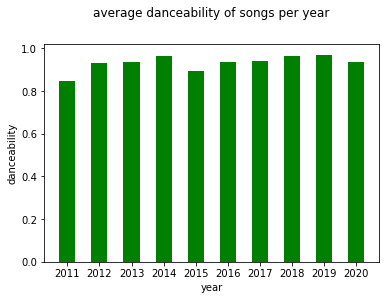

In [238]:
#Visualizations
plt.bar(billboard_df['year'], billboard_df['danceability'], width =.5, color = 'green')
plt.xlabel('year')
plt.ylabel('danceability')
plt.title('average danceability of songs per year', y=1.1)
plt.show()

In 2014, the top 100 songs tended to have the highest danceability rating. The average for each year's Top 100 remained high throughout the dedade, perhaps why the songs were so popular. 

Text(0.5, 1.0, 'Valence per year')

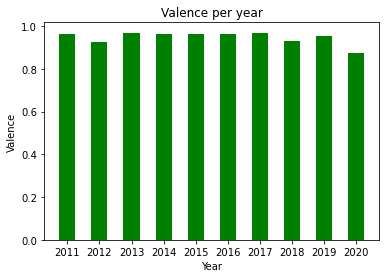

In [248]:
#Visualizations
plt.bar(billboard_df.year, billboard_df.valence, width = 0.5, color = 'green')
  
plt.xlabel('Year')
plt.ylabel('Valence')
plt.title('Valence per year')

Valence was a very interesting measurement to me. It was at its highest in 2011 and 2013, but is noticeably lower in 2020. Again, I have a hunch this has a correlation to the world being locked down in quarantine. A possible explanation is that people tended to listen to and popularize more depressing songs because of the pandemic.

<AxesSubplot:>

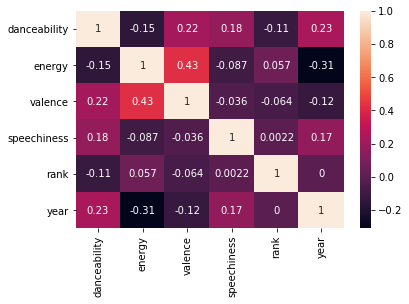

In [217]:
billboard_df_narrowed = billboard_df[['danceability', 'energy', 'valence', 'speechiness', 'rank', 'year']]

corr = billboard_df_narrowed.corr()
sns.heatmap(corr, annot = True)

According to this correlation heatmap, valence and enery had the strongest correlation. This makes sense because we could expect that the higher the energy in the song, the more positive sentiment it gives off.

Next, a sample of the top 100 songs for the past decade were compared to Earl Sweatshirt's dentire discography. After seeing such high numbers for things like energy and danceability for songs that made billboard charts, I wanted to compare them to the audio features of songs that are way lower tempo and, albeit, more depressing. Earl Seatshirt is a rapper that tends to have darker subjects to all of his songs and lyrics. The audio features were pulled in and compared below.

In [163]:
playlist = sp.user_playlist("cloughjack.bchs", "1Qr6oGmsuzvmMC7Uf8wWfH") 

songs = playlist["tracks"]["items"] 
ids = []
for i in range(len(songs)): 
    ids.append(songs[i]["track"]["id"]) 
features = sp.audio_features(ids) 
earl_sweatshirt = pd.DataFrame(features)

track_list = []
results = sp.playlist(playlist['id'], fields="tracks,next")
tracks = results['tracks']
show_tracks(tracks)
len(track_list)

years = ['2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', '2013', 
        '2013', '2013', '2015', '2015','2015','2015','2015','2015','2015','2015','2015', '2015', '2018', '2018', '2018', 
        '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2020', 
        '2020', '2020', '2020', '2020', '2020', '2020', '2013', '2013', '2020']

earl_sweatshirt['track_names'] = track_list
earl_sweatshirt['year'] = years

earl_sweatshirt.drop(['type', 'id', 'uri', 'track_href', 'analysis_url'], axis = 1, inplace = True)

earl_sweatshirt

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_names,year
0,0.668,0.577,9,-6.984,1,0.0634,0.14900,0.001110,0.1820,0.557,99.957,172493,4,Pre (feat. SK La' Flare),2013
1,0.539,0.846,0,-5.539,1,0.2520,0.21800,0.000000,0.2510,0.490,130.358,127413,4,Burgundy (feat. Vince Staples),2013
2,0.498,0.748,8,-7.218,1,0.4340,0.05820,0.000000,0.2810,0.426,77.601,132373,4,20 Wave Caps (feat. Domo Genesis),2013
3,0.716,0.568,2,-8.904,1,0.2120,0.27800,0.000002,0.3850,0.905,136.894,205800,4,Sunday (feat. Frank Ocean),2013
4,0.619,0.742,1,-6.995,1,0.4960,0.20400,0.000000,0.1660,0.782,144.602,277240,4,Hive (feat. Vince Staples & Casey Veggies),2013
5,0.510,0.503,10,-8.756,0,0.2420,0.02160,0.002000,0.1080,0.193,153.582,243773,4,Chum,2013
6,0.457,0.687,9,-7.506,1,0.3160,0.01230,0.000000,0.7030,0.217,80.510,168240,4,"Sasquatch (feat. Tyler, The Creator)",2013
7,0.348,0.796,7,-8.266,1,0.4850,0.06550,0.000000,0.2790,0.573,166.224,183960,4,Centurion (feat. Vince Staples),2013
8,0.313,0.187,1,-13.760,1,0.0391,0.66400,0.757000,0.0940,0.306,145.606,91627,4,523,2013
9,0.646,0.746,7,-7.155,1,0.3410,0.09810,0.000000,0.4200,0.585,47.092,52627,4,Uncle Al,2013


In [164]:
earl_cols = earl_sweatshirt.columns.tolist()
earl_cols = ['year', 'track_names', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                'acousticness', 'instrumentalness','liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
earl_df = earl_sweatshirt[earl_cols]
earl_df.rename(columns = {'track_names' : 'title'}, inplace = True)

['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'track_names', 'year']


In [173]:
billboard_sample = billboard_df.sample(n=50, random_state=1)

<AxesSubplot:>

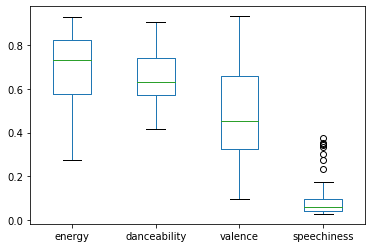

In [246]:
billboard_box = billboard_sample[["energy", "danceability", "valence", "speechiness"]]
billboard_box.plot.box()

<AxesSubplot:>

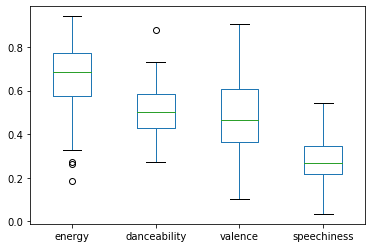

In [245]:
earl_box = earl_df[["energy", "danceability", "valence", "speechiness"]]
earl_box.plot.box()

In [254]:
earl_df[earl_df['danceability'] > 0.8]

,year,title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
23,2015,DNA (feat. Na-kel),0.876,0.553,1,-9.209,1,0.236,0.498,0.000649,0.186,0.326,119.983,232373,4


I thought there was no way an Earl Sweatshirt song was any bit danceable, let alone .8 out of 1 danceable, but I picked this song out, listened to it... I started grooving to it. Lots to take away from this project.

The boxplot of the top 100 songs show surprisingly similar spreads and average values for energy and valence. Not surprisingly, Earl Sweatshirt's songs had a more consistent speechiness spread with no outliers. The sample from the top 100 had a lot of inconsistency to the speechiness of its songs, probably representing the rap songs contained in the sample. However, they did tend to contain less lyrical content, on average.

## Takeaways
After the analysis, I have some takeaways of what the data is showing. Clearly, songs that have made the Billboard Top 100 tend to have higher energy and "danceability". This is compared to its alternative, a song with low energy that people would not want to dance to. This makes logical sense for what makes a song popular and what gets people to play them more.

2020 clearly shows a change in listener habits. In years prior, songs in the top 100 were higher energy and of higher valence. Maybe it suggests a spike in depression rates with the pandemic and, as a reuslt, people listening to more depressing music.

The audio features of a song are clearly not as easy to determine as I thought. I thought Earl Sweatshirt songs would all have very low valence, but I was clearly wrong. Clearly, a song's sentiment is way more variable than I presumed.

Songs that make the Billboard top 100 tend to not have much unique lyrical content. Looking back on songs like Party Rock Anthem and Baby Shark that made the charts, this makes sense. With this, I conclude that one of the trends of popular songs from the past decade is that they are repetitive and focused on catchiness/danceability than unique lyrics.

## Ideas for future projects
Determine maximum average beats per minute for a playlist to be good for studying.
Determine the minimum average energy, danceability level for a playlist to be good for Meagher Bar's Power Hour.
Pull popularity, find trends of what has made songs popular through the decades, subset up and coming artists on Spotify, find ones whose songs fall into the trend of popular songs from the past year, make predictions on the next breakthrough artists.
Do the same thing as above, but instead of artists, use genres. See if there could be a comeback of punk rock, blues rock, etc. to take over as the most popular genre.